# Analyse Exploratoire des Données - Hotel Booking Demand
Afin de ne pas surcharger nos notebooks, nous avons décidé de séparer la partie EDA de notre travail ML. <br> Ainsi, ce notebook contient uniquement l'EDA de notre projet. <br> Pour la partie ML et le contexte du projet, voir code "Projet_AAA.ipynb".

In [3]:
# Importations des modules nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

In [4]:
# Importation des données
chemin_fichier = "https://raw.githubusercontent.com/firasbouzazi/Hotel-reservation/main/hotel_bookings.csv"
df = pd.read_csv(chemin_fichier, sep=',', encoding='utf-8')

print(f"Dimensions du dataset: {df.shape[0]} lignes et {df.shape[1]} colonnes")
df.head()

Dimensions du dataset: 119390 lignes et 32 colonnes


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 1. Aperçu Général des Données

In [5]:
# Statistiques descriptives pour les variables numériques
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## 2. Préparation des Données temporelles


In [6]:
# Conversion de la date de réservation
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Création de nouvelles variables utiles
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_cost'] = df['adr'] * df['total_nights']



## 3. Analyse Univariée - Distributions


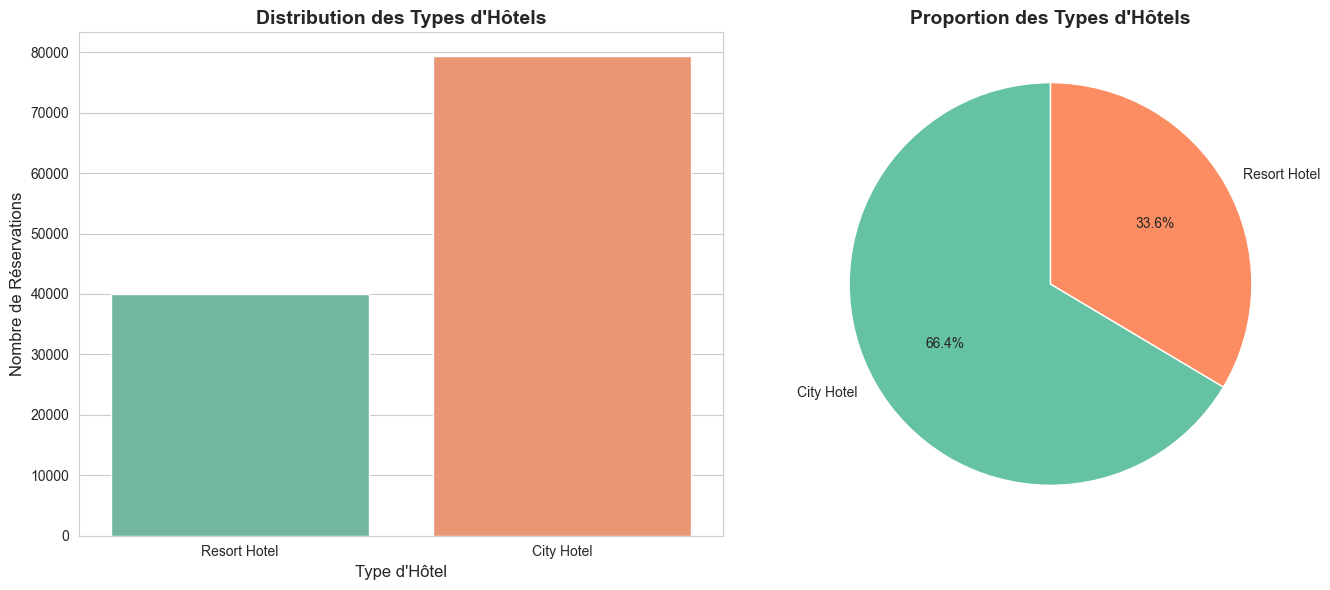


Répartition:
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

Pourcentages:
hotel
City Hotel      66.446101
Resort Hotel    33.553899
Name: proportion, dtype: float64


In [7]:
# Distribution des types d'hôtels
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot
sns.countplot(data=df, x='hotel', palette='Set2', ax=axes[0])
axes[0].set_title('Distribution des Types d\'Hôtels', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Type d\'Hôtel', fontsize=12)
axes[0].set_ylabel('Nombre de Réservations', fontsize=12)

# Pie chart
hotel_counts = df['hotel'].value_counts()
axes[1].pie(hotel_counts.values, labels=hotel_counts.index, autopct='%1.1f%%',
            colors=sns.color_palette('Set2'), startangle=90)
axes[1].set_title('Proportion des Types d\'Hôtels', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nRépartition:\n{df['hotel'].value_counts()}")
print(f"\nPourcentages:\n{df['hotel'].value_counts(normalize=True) * 100}")


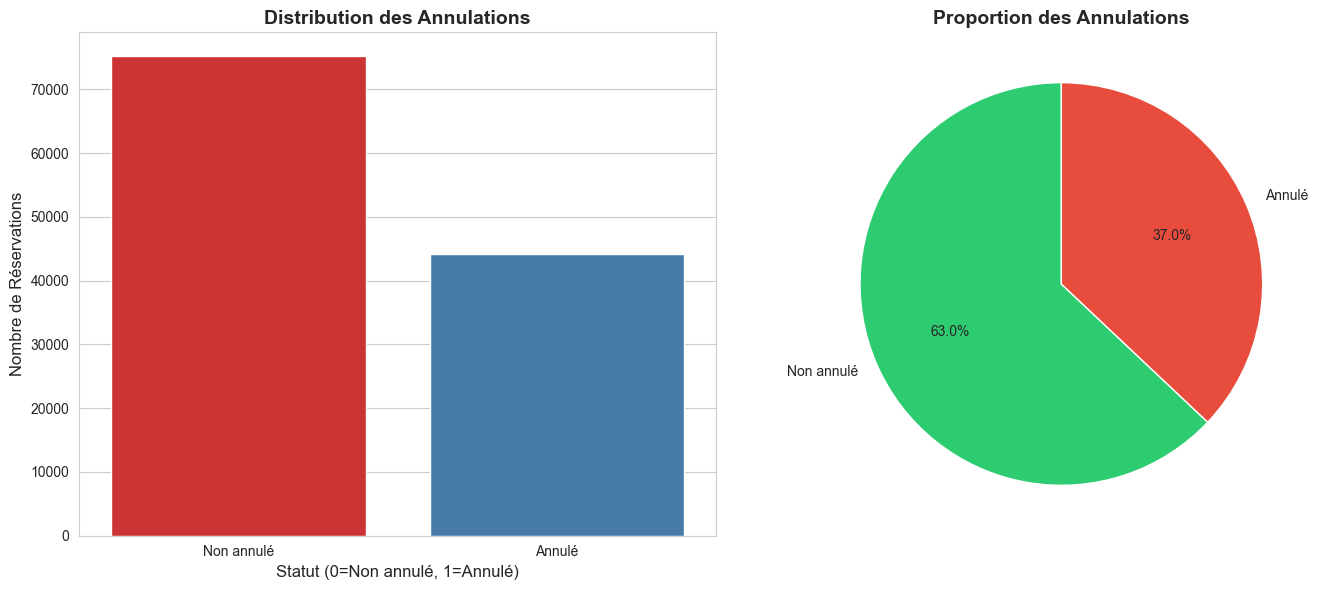


Taux d'annulation: 37.04%

Répartition:
is_canceled
0    75166
1    44224
Name: count, dtype: int64


In [8]:
# Distribution du statut d'annulation
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot
cancel_counts = df['is_canceled'].value_counts()
sns.countplot(data=df, x='is_canceled', palette='Set1', ax=axes[0])
axes[0].set_title('Distribution des Annulations', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Statut (0=Non annulé, 1=Annulé)', fontsize=12)
axes[0].set_ylabel('Nombre de Réservations', fontsize=12)
axes[0].set_xticklabels(['Non annulé', 'Annulé'])

# Pie chart
axes[1].pie(cancel_counts.values, labels=['Non annulé', 'Annulé'], autopct='%1.1f%%',
            colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Proportion des Annulations', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTaux d'annulation: {df['is_canceled'].mean() * 100:.2f}%")
print(f"\nRépartition:\n{df['is_canceled'].value_counts()}")


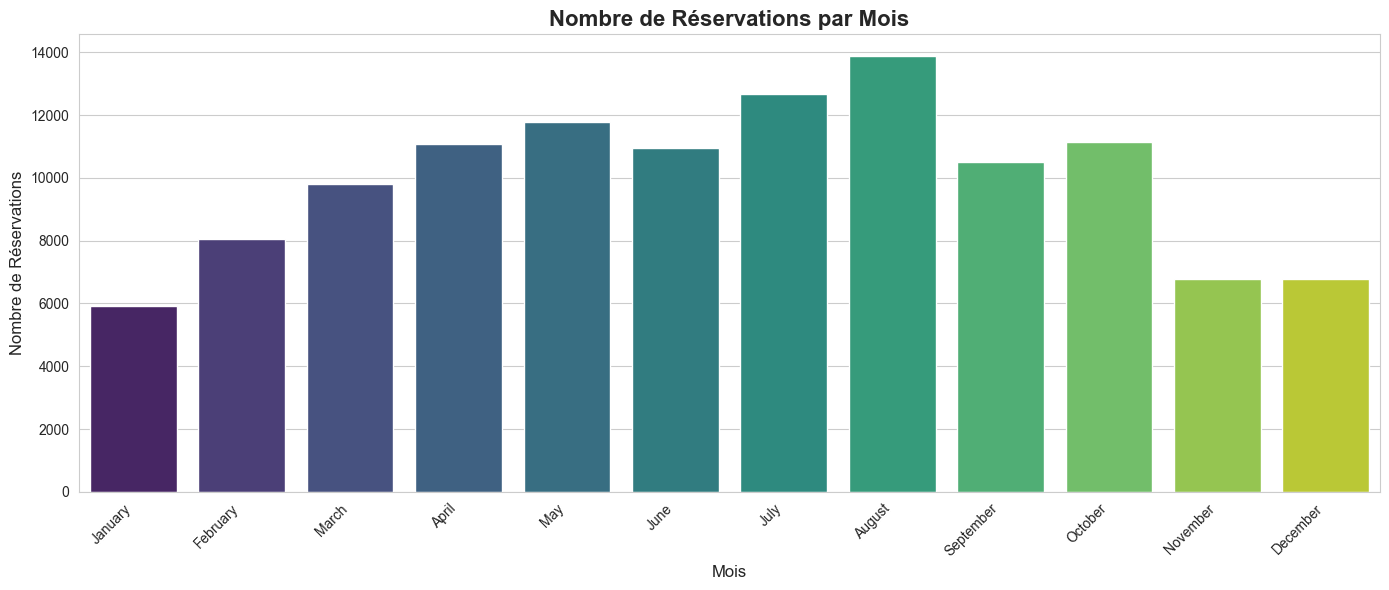


Top 5 mois avec le plus de réservations:
arrival_date_month
August     13877
July       12661
May        11791
October    11160
April      11089
Name: count, dtype: int64


In [9]:
# Distribution des réservations par mois
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='arrival_date_month', order=month_order, palette='viridis')
plt.title('Nombre de Réservations par Mois', fontsize=16, fontweight='bold')
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre de Réservations', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nTop 5 mois avec le plus de réservations:")
print(df['arrival_date_month'].value_counts().head())


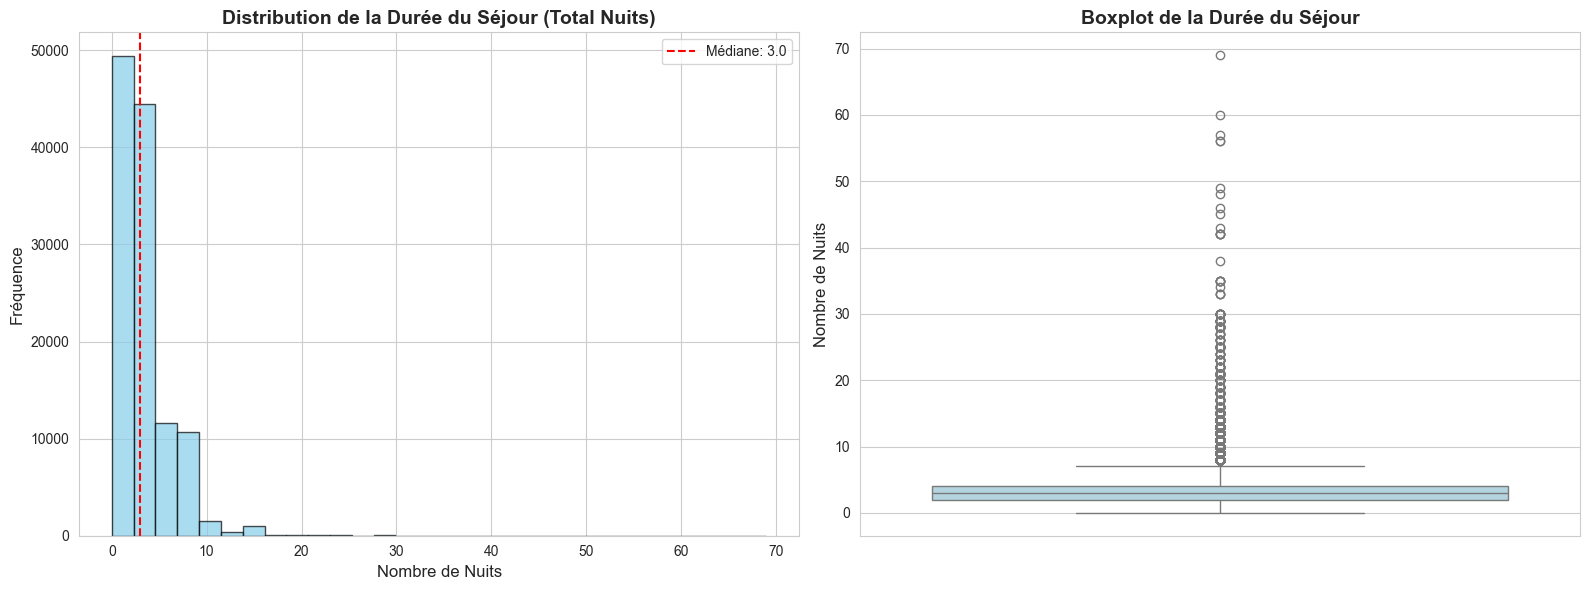


Statistiques de la durée du séjour:
count    119390.000000
mean          3.427900
std           2.557439
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: total_nights, dtype: float64


In [10]:
# Distribution de la durée du séjour

df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogramme
axes[0].hist(df['total_nights'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution de la Durée du Séjour (Total Nuits)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Nombre de Nuits', fontsize=12)
axes[0].set_ylabel('Fréquence', fontsize=12)
axes[0].axvline(df['total_nights'].median(), color='red', linestyle='--',
                label=f'Médiane: {df["total_nights"].median():.1f}')
axes[0].legend()

# Boxplot
sns.boxplot(data=df, y='total_nights', ax=axes[1], color='lightblue')
axes[1].set_title('Boxplot de la Durée du Séjour', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Nombre de Nuits', fontsize=12)

plt.tight_layout()
plt.show()

print(f"\nStatistiques de la durée du séjour:")
print(df['total_nights'].describe())


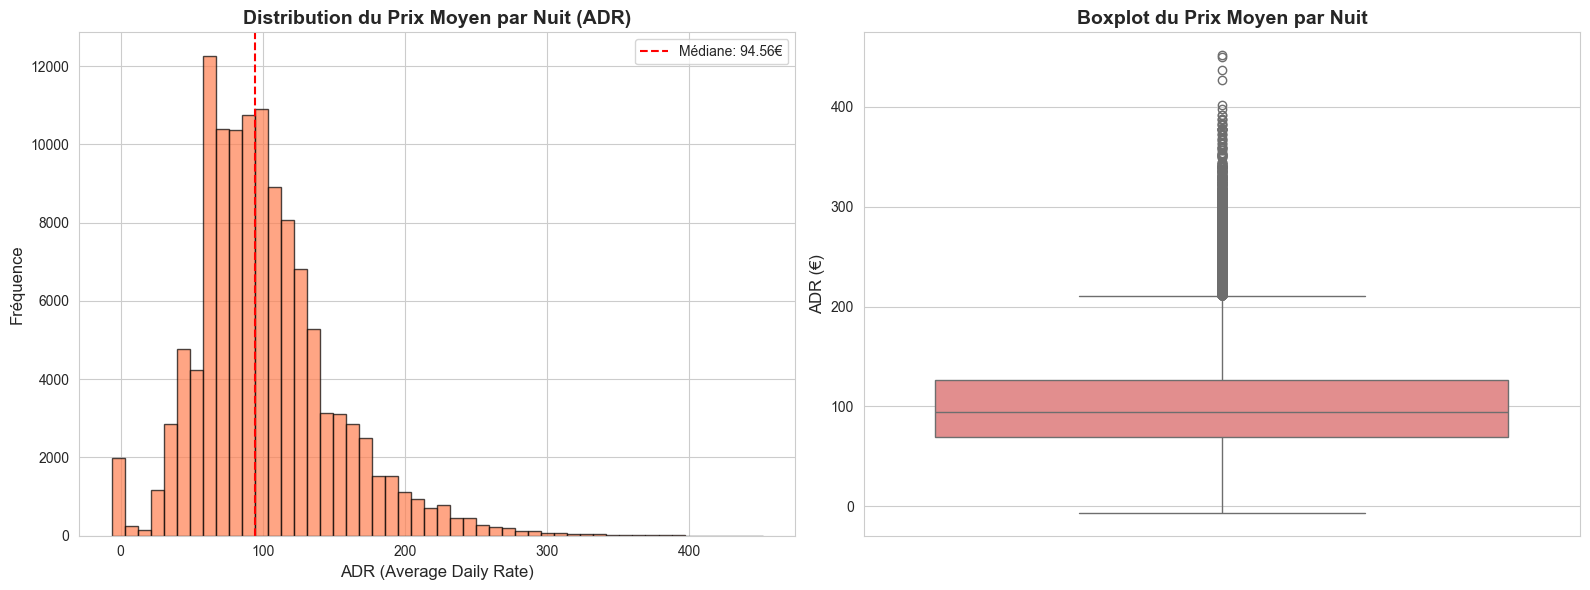


Statistiques de l'ADR (valeurs < 500€):
count    119387.000000
mean        101.779922
std          48.125104
min          -6.380000
25%          69.290000
50%          94.560000
75%         126.000000
max         451.500000
Name: adr, dtype: float64


In [11]:
# Distribution du prix moyen par nuit (ADR)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogramme (avec limite pour exclure les valeurs aberrantes)
df_adr_clean = df[df['adr'] < 500]  # Exclure les valeurs extrêmes
axes[0].hist(df_adr_clean['adr'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution du Prix Moyen par Nuit (ADR)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('ADR (Average Daily Rate)', fontsize=12)
axes[0].set_ylabel('Fréquence', fontsize=12)
axes[0].axvline(df_adr_clean['adr'].median(), color='red', linestyle='--',
                label=f'Médiane: {df_adr_clean["adr"].median():.2f}€')
axes[0].legend()

# Boxplot
sns.boxplot(data=df_adr_clean, y='adr', ax=axes[1], color='lightcoral')
axes[1].set_title('Boxplot du Prix Moyen par Nuit', fontsize=14, fontweight='bold')
axes[1].set_ylabel('ADR (€)', fontsize=12)

plt.tight_layout()
plt.show()

print(f"\nStatistiques de l'ADR (valeurs < 500€):")
print(df_adr_clean['adr'].describe())


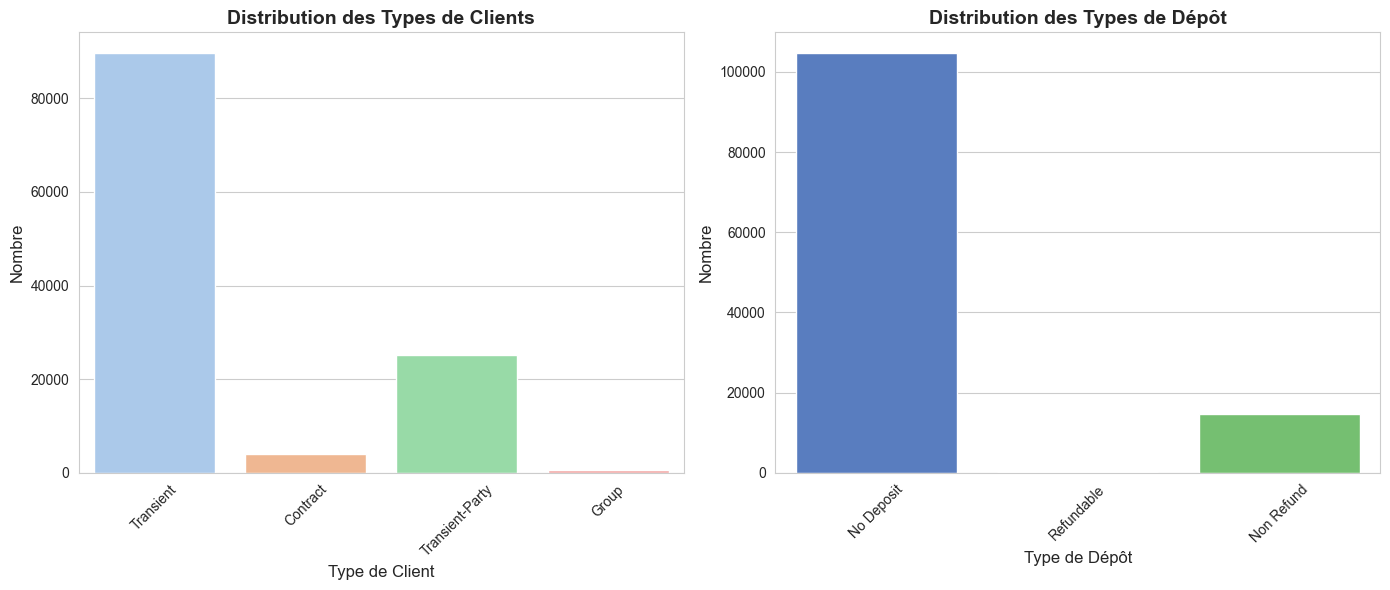

In [12]:
# Distribution des types de clients
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Customer type
sns.countplot(data=df, x='customer_type', palette='pastel', ax=axes[0])
axes[0].set_title('Distribution des Types de Clients', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Type de Client', fontsize=12)
axes[0].set_ylabel('Nombre', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Deposit type
sns.countplot(data=df, x='deposit_type', palette='muted', ax=axes[1])
axes[1].set_title('Distribution des Types de Dépôt', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Type de Dépôt', fontsize=12)
axes[1].set_ylabel('Nombre', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


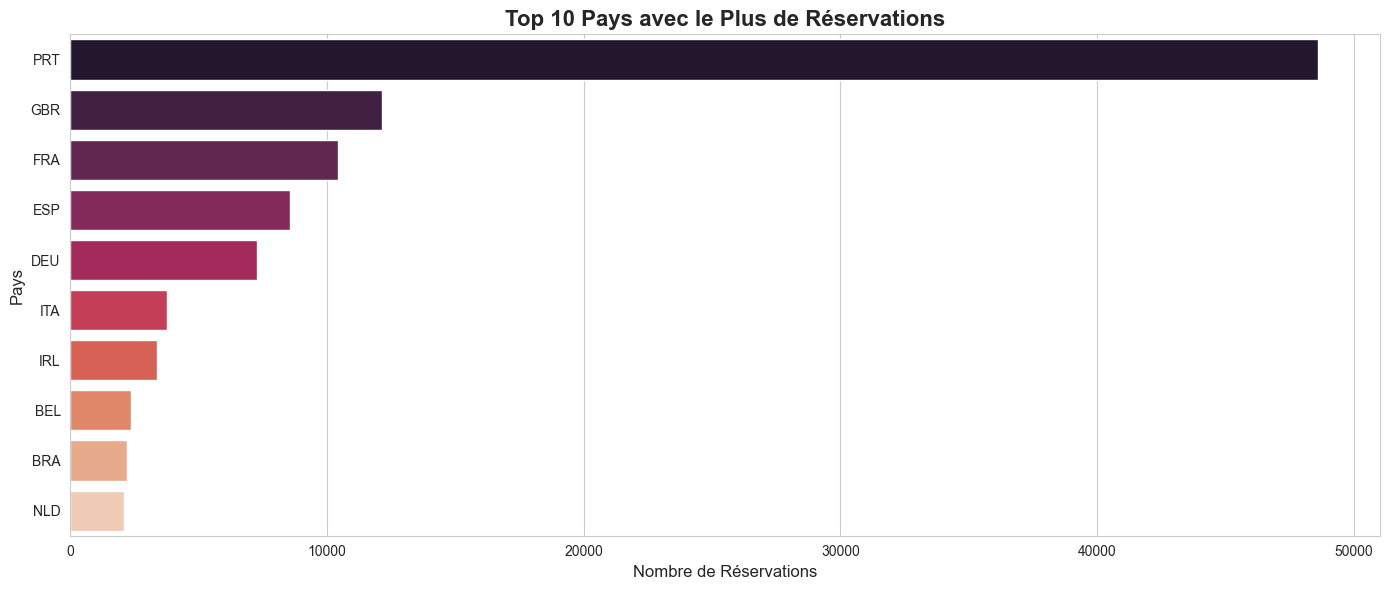


Top 10 pays:
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64


In [13]:
# Top 10 pays avec le plus de réservations
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')
plt.title('Top 10 Pays avec le Plus de Réservations', fontsize=16, fontweight='bold')
plt.xlabel('Nombre de Réservations', fontsize=12)
plt.ylabel('Pays', fontsize=12)
plt.tight_layout()
plt.show()

print("\nTop 10 pays:")
print(top_countries)


## 4. Analyse Bivariée - Relations avec l'Annulation


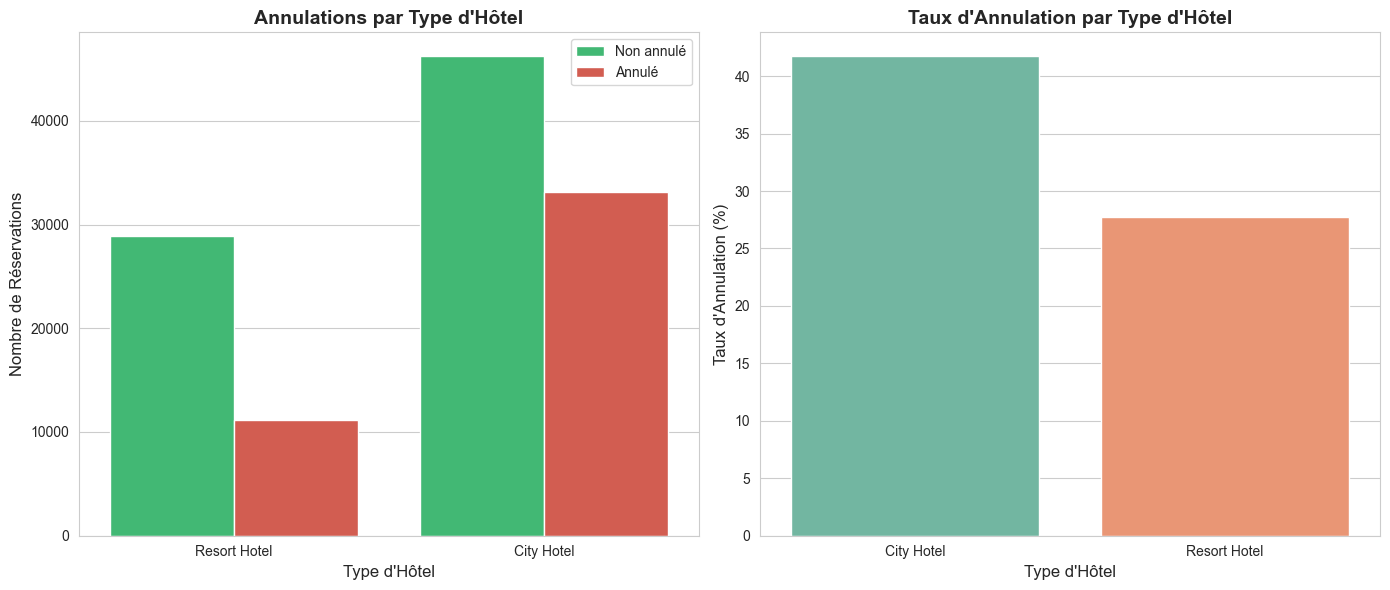


Taux d'annulation par type d'hôtel:
                   mean    count
hotel                           
City Hotel    41.726963  7933000
Resort Hotel  27.763355  4006000


In [14]:
# Taux d'annulation par type d'hôtel
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot
sns.countplot(data=df, x='hotel', hue='is_canceled', palette=['#2ecc71', '#e74c3c'], ax=axes[0])
axes[0].set_title('Annulations par Type d\'Hôtel', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Type d\'Hôtel', fontsize=12)
axes[0].set_ylabel('Nombre de Réservations', fontsize=12)
axes[0].legend(['Non annulé', 'Annulé'])

# Taux d'annulation
cancel_by_hotel = df.groupby('hotel')['is_canceled'].agg(['mean', 'count'])
cancel_by_hotel['mean'] = cancel_by_hotel['mean'] * 100
sns.barplot(data=cancel_by_hotel.reset_index(), x='hotel', y='mean', palette='Set2', ax=axes[1])
axes[1].set_title('Taux d\'Annulation par Type d\'Hôtel', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Type d\'Hôtel', fontsize=12)
axes[1].set_ylabel('Taux d\'Annulation (%)', fontsize=12)

plt.tight_layout()
plt.show()

print("\nTaux d'annulation par type d'hôtel:")
print(df.groupby('hotel')['is_canceled'].agg(['mean', 'count']) * 100)


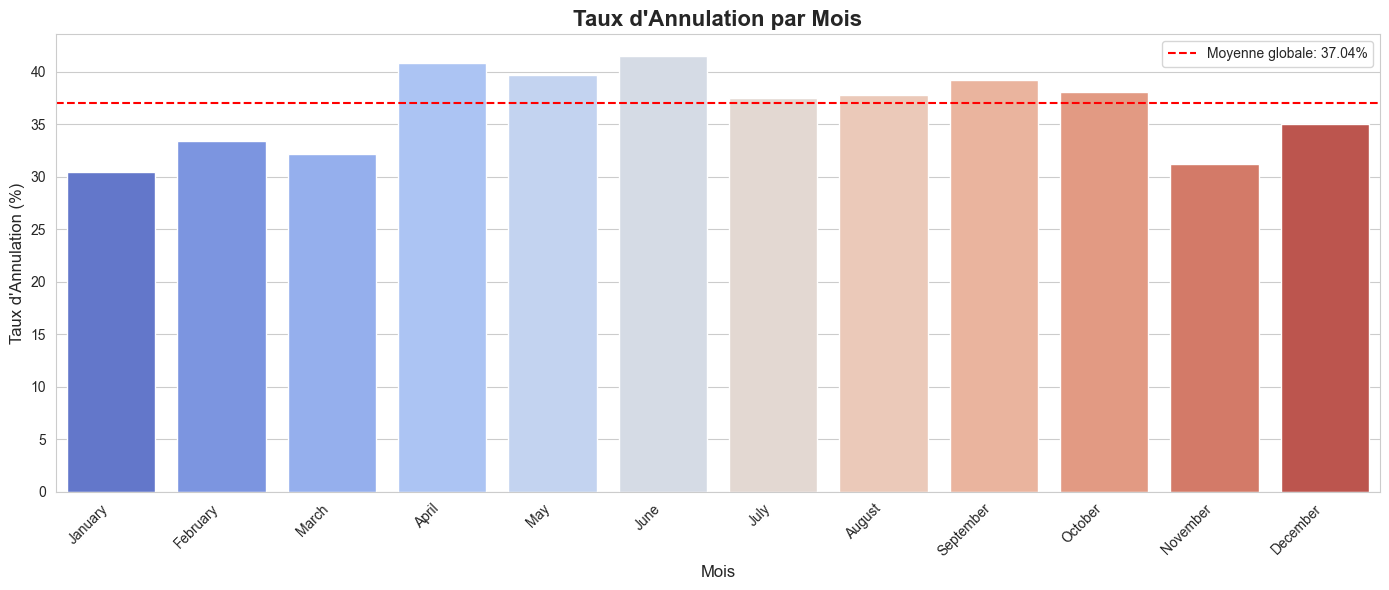


Taux d'annulation par mois:
arrival_date_month
January      30.477315
February     33.415964
March        32.152338
April        40.797186
May          39.665847
June         41.457172
July         37.453598
August       37.753117
September    39.170156
October      38.046595
November     31.233441
December     34.970501
Name: is_canceled, dtype: float64


In [15]:
# Taux d'annulation par mois
cancel_by_month = df.groupby('arrival_date_month')['is_canceled'].mean() * 100
cancel_by_month = cancel_by_month.reindex(month_order)

plt.figure(figsize=(14, 6))
sns.barplot(x=cancel_by_month.index, y=cancel_by_month.values, palette='coolwarm')
plt.title('Taux d\'Annulation par Mois', fontsize=16, fontweight='bold')
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Taux d\'Annulation (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.axhline(df['is_canceled'].mean() * 100, color='red', linestyle='--',
            label=f'Moyenne globale: {df["is_canceled"].mean() * 100:.2f}%')
plt.legend()
plt.tight_layout()
plt.show()

print("\nTaux d'annulation par mois:")
print(cancel_by_month)


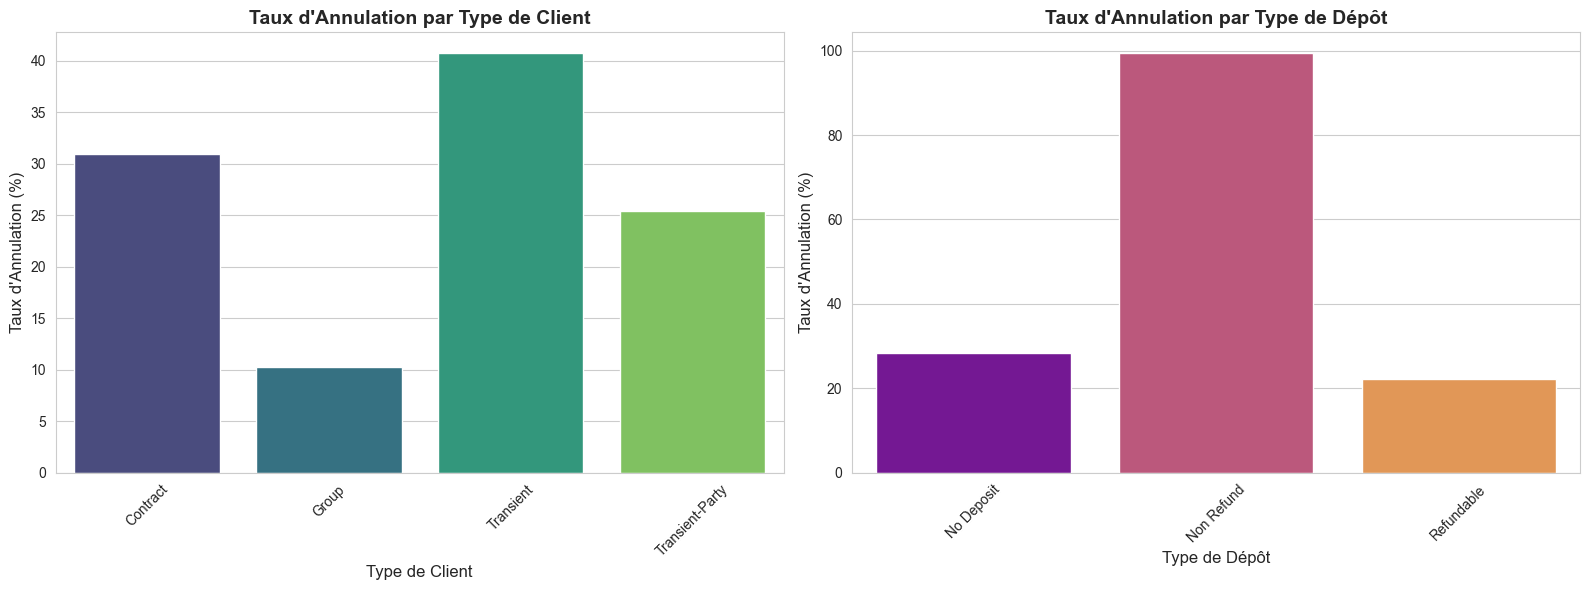


Taux d'annulation par type de client:
customer_type
Contract           30.961727
Group              10.225303
Transient          40.746320
Transient-Party    25.429868
Name: is_canceled, dtype: float64

Taux d'annulation par type de dépôt:
deposit_type
No Deposit    28.377022
Non Refund    99.362446
Refundable    22.222222
Name: is_canceled, dtype: float64


In [16]:
# Taux d'annulation par type de client
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Customer type
cancel_by_customer = df.groupby('customer_type')['is_canceled'].mean() * 100
sns.barplot(x=cancel_by_customer.index, y=cancel_by_customer.values, palette='viridis', ax=axes[0])
axes[0].set_title('Taux d\'Annulation par Type de Client', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Type de Client', fontsize=12)
axes[0].set_ylabel('Taux d\'Annulation (%)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Deposit type
cancel_by_deposit = df.groupby('deposit_type')['is_canceled'].mean() * 100
sns.barplot(x=cancel_by_deposit.index, y=cancel_by_deposit.values, palette='plasma', ax=axes[1])
axes[1].set_title('Taux d\'Annulation par Type de Dépôt', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Type de Dépôt', fontsize=12)
axes[1].set_ylabel('Taux d\'Annulation (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nTaux d'annulation par type de client:")
print(cancel_by_customer)
print("\nTaux d'annulation par type de dépôt:")
print(cancel_by_deposit)


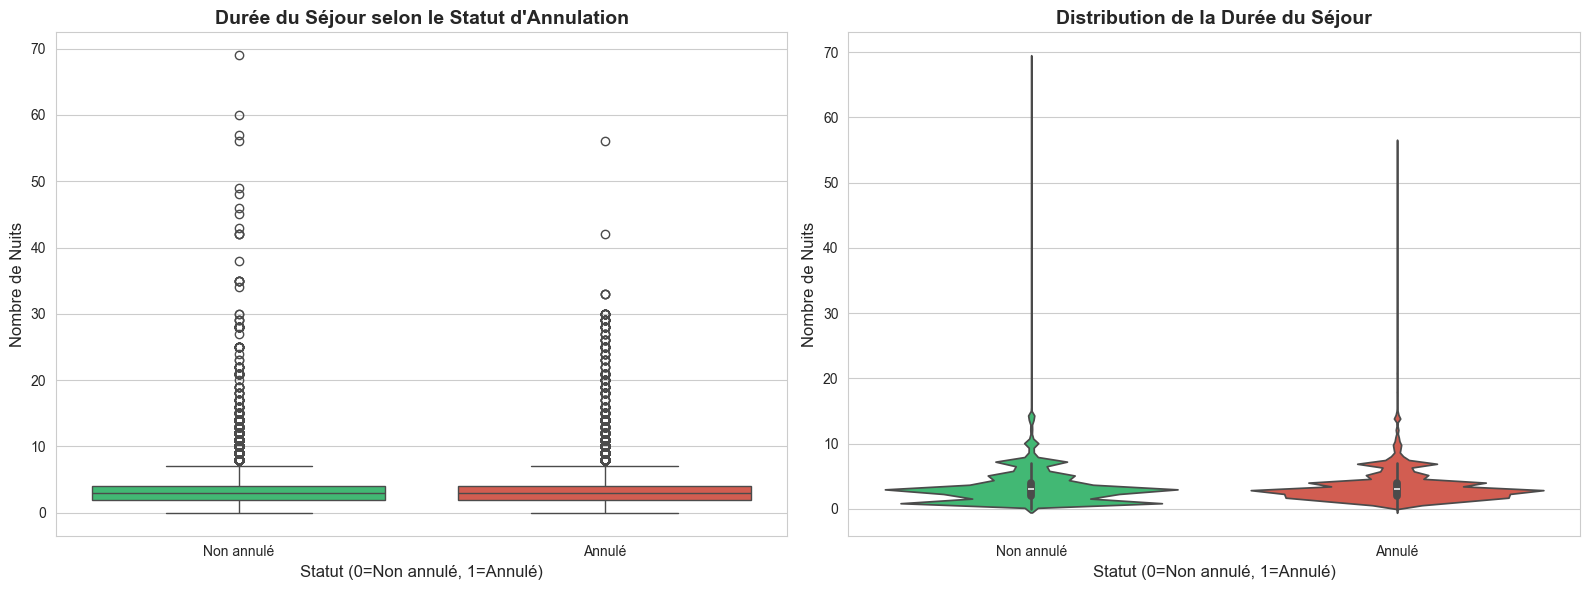


Durée moyenne du séjour:
                 mean  median
is_canceled                  
0            3.393023     3.0
1            3.487179     3.0


In [17]:
# Distribution de la durée du séjour selon l'annulation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot
sns.boxplot(data=df, x='is_canceled', y='total_nights', palette=['#2ecc71', '#e74c3c'], ax=axes[0])
axes[0].set_title('Durée du Séjour selon le Statut d\'Annulation', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Statut (0=Non annulé, 1=Annulé)', fontsize=12)
axes[0].set_ylabel('Nombre de Nuits', fontsize=12)
axes[0].set_xticklabels(['Non annulé', 'Annulé'])

# Violin plot
sns.violinplot(data=df, x='is_canceled', y='total_nights', palette=['#2ecc71', '#e74c3c'], ax=axes[1])
axes[1].set_title('Distribution de la Durée du Séjour', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Statut (0=Non annulé, 1=Annulé)', fontsize=12)
axes[1].set_ylabel('Nombre de Nuits', fontsize=12)
axes[1].set_xticklabels(['Non annulé', 'Annulé'])

plt.tight_layout()
plt.show()

print("\nDurée moyenne du séjour:")
print(df.groupby('is_canceled')['total_nights'].agg(['mean', 'median']))


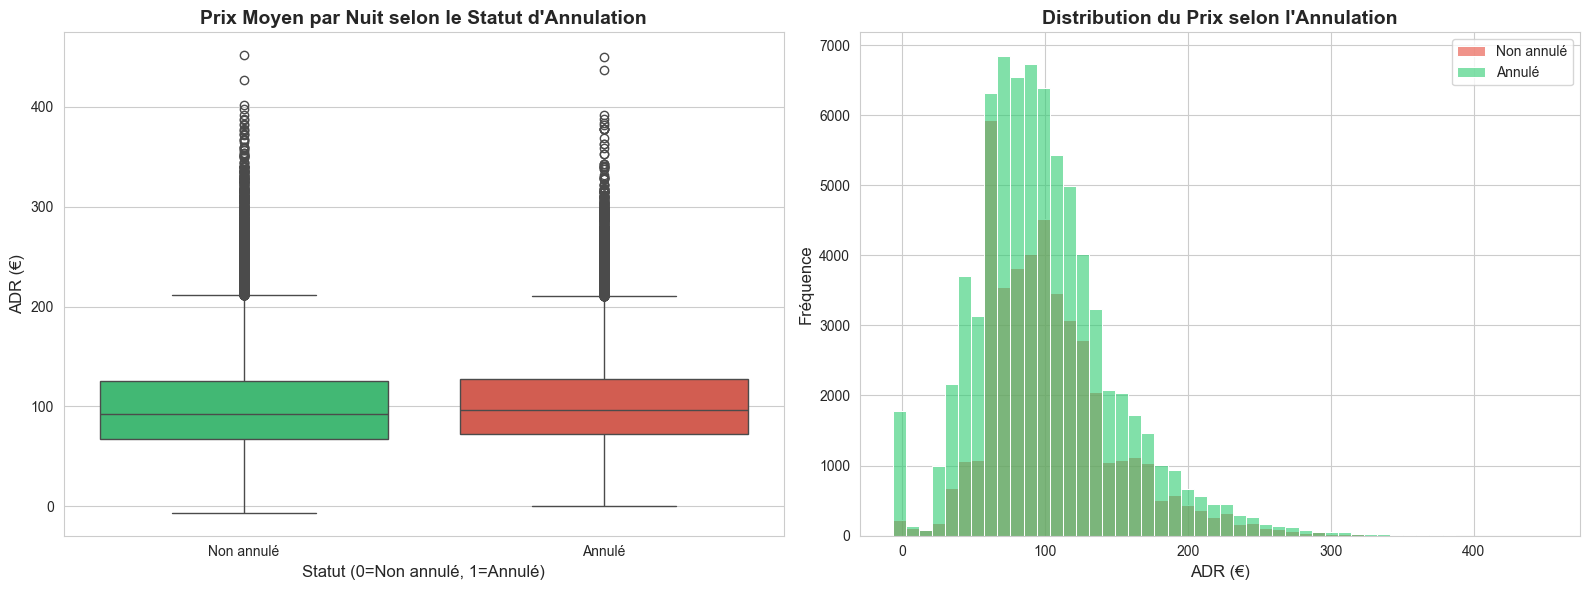


Prix moyen par nuit (ADR):
                   mean  median
is_canceled                    
0             99.976810    92.5
1            104.844598    96.2


In [18]:
# Distribution du prix (ADR) selon l'annulation
df_adr_clean = df[df['adr'] < 500]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot
sns.boxplot(data=df_adr_clean, x='is_canceled', y='adr', palette=['#2ecc71', '#e74c3c'], ax=axes[0])
axes[0].set_title('Prix Moyen par Nuit selon le Statut d\'Annulation', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Statut (0=Non annulé, 1=Annulé)', fontsize=12)
axes[0].set_ylabel('ADR (€)', fontsize=12)
axes[0].set_xticklabels(['Non annulé', 'Annulé'])

# Distribution
sns.histplot(data=df_adr_clean, x='adr', hue='is_canceled', bins=50,
             palette=['#2ecc71', '#e74c3c'], alpha=0.6, ax=axes[1])
axes[1].set_title('Distribution du Prix selon l\'Annulation', fontsize=14, fontweight='bold')
axes[1].set_xlabel('ADR (€)', fontsize=12)
axes[1].set_ylabel('Fréquence', fontsize=12)
axes[1].legend(['Non annulé', 'Annulé'])

plt.tight_layout()
plt.show()

print("\nPrix moyen par nuit (ADR):")
print(df_adr_clean.groupby('is_canceled')['adr'].agg(['mean', 'median']))


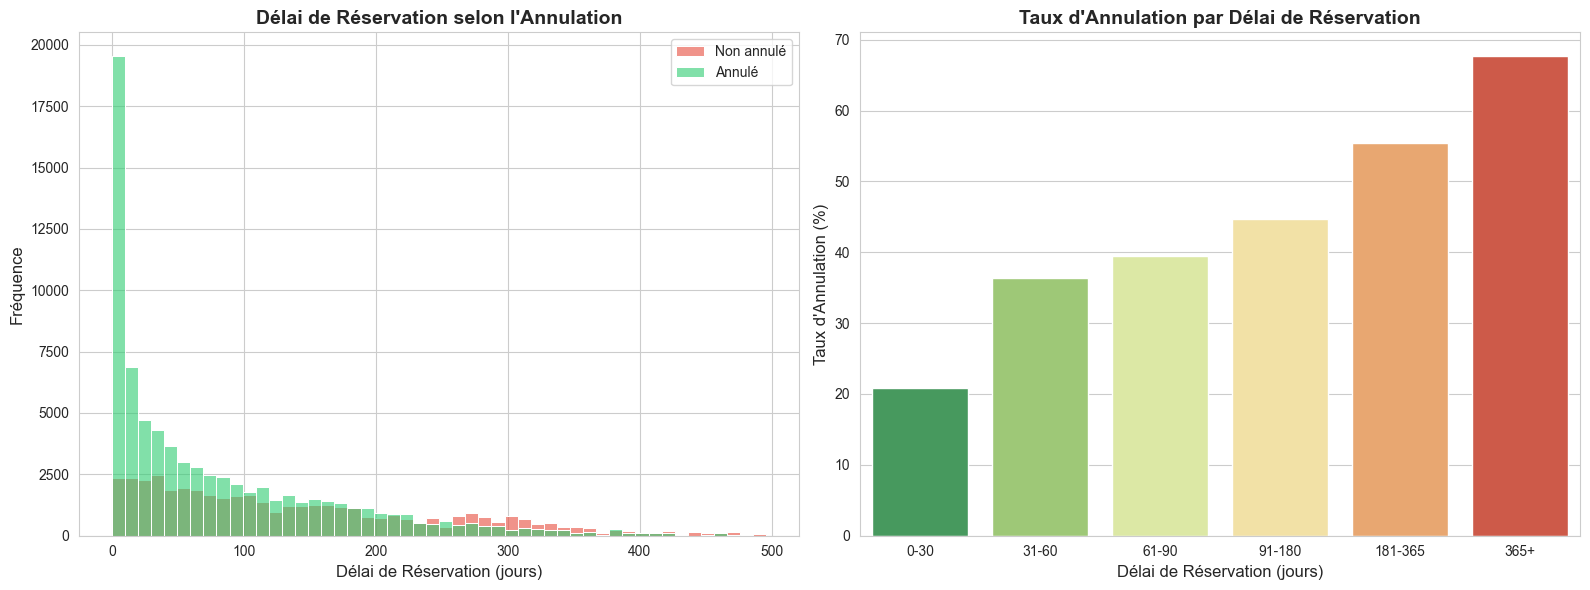


Taux d'annulation par délai de réservation:
lead_time_category
0-30       20.873891
31-60      36.381850
61-90      39.473893
91-180     44.710466
181-365    55.453955
365+       67.662008
Name: is_canceled, dtype: float64

Délai moyen (non annulé): 80.0 jours
Délai moyen (annulé): 144.8 jours


In [19]:
# Taux d'annulation par délai de réservation (lead_time)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Distribution du lead_time
df_lead_clean = df[df['lead_time'] <= 500]  # Limiter les valeurs extrêmes
sns.histplot(data=df_lead_clean, x='lead_time', hue='is_canceled', bins=50,
             palette=['#2ecc71', '#e74c3c'], alpha=0.6, ax=axes[0])
axes[0].set_title('Délai de Réservation selon l\'Annulation', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Délai de Réservation (jours)', fontsize=12)
axes[0].set_ylabel('Fréquence', fontsize=12)
axes[0].legend(['Non annulé', 'Annulé'])

# Taux d'annulation par catégorie de délai
df['lead_time_category'] = pd.cut(df['lead_time'], bins=[0, 30, 60, 90, 180, 365, float('inf')],
                                   labels=['0-30', '31-60', '61-90', '91-180', '181-365', '365+'])
cancel_by_lead = df.groupby('lead_time_category')['is_canceled'].mean() * 100
sns.barplot(x=cancel_by_lead.index, y=cancel_by_lead.values, palette='RdYlGn_r', ax=axes[1])
axes[1].set_title('Taux d\'Annulation par Délai de Réservation', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Délai de Réservation (jours)', fontsize=12)
axes[1].set_ylabel('Taux d\'Annulation (%)', fontsize=12)

plt.tight_layout()
plt.show()

print("\nTaux d'annulation par délai de réservation:")
print(cancel_by_lead)
print(f"\nDélai moyen (non annulé): {df[df['is_canceled']==0]['lead_time'].mean():.1f} jours")
print(f"Délai moyen (annulé): {df[df['is_canceled']==1]['lead_time'].mean():.1f} jours")


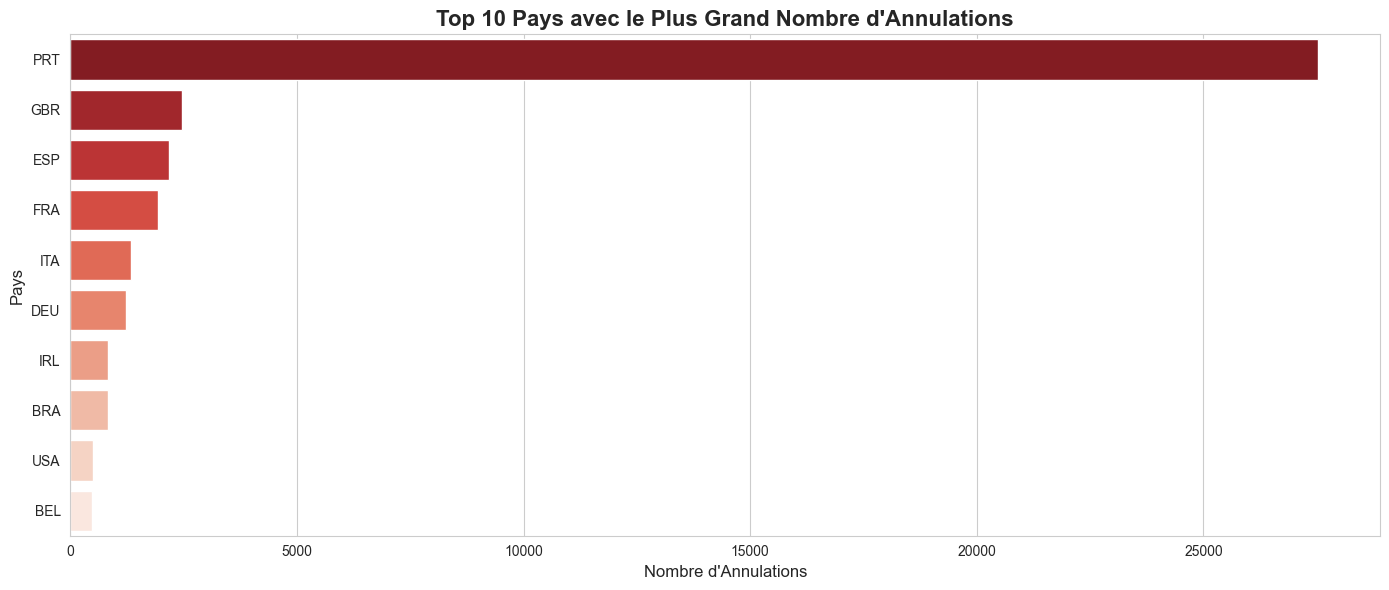


Top 10 pays avec le plus d'annulations:
country
PRT    27519
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: count, dtype: int64


In [20]:
# Top 10 pays avec le plus grand nombre d'annulations
top_cancel_countries = df[df['is_canceled'] == 1]['country'].value_counts().head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=top_cancel_countries.values, y=top_cancel_countries.index, palette='Reds_r')
plt.title('Top 10 Pays avec le Plus Grand Nombre d\'Annulations', fontsize=16, fontweight='bold')
plt.xlabel('Nombre d\'Annulations', fontsize=12)
plt.ylabel('Pays', fontsize=12)
plt.tight_layout()
plt.show()

print("\nTop 10 pays avec le plus d'annulations:")
print(top_cancel_countries)


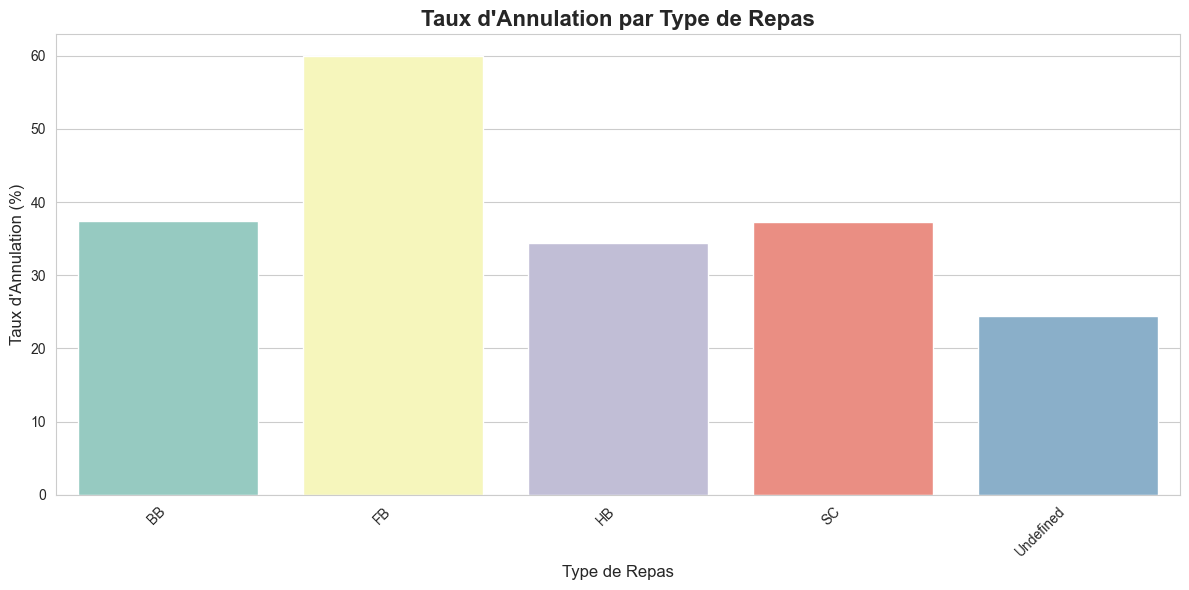


Taux d'annulation par type de repas:
meal
BB           37.384899
FB           59.899749
HB           34.460347
SC           37.239437
Undefined    24.465355
Name: is_canceled, dtype: float64


In [21]:
# Taux d'annulation par type de repas
cancel_by_meal = df.groupby('meal')['is_canceled'].mean() * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=cancel_by_meal.index, y=cancel_by_meal.values, palette='Set3')
plt.title('Taux d\'Annulation par Type de Repas', fontsize=16, fontweight='bold')
plt.xlabel('Type de Repas', fontsize=12)
plt.ylabel('Taux d\'Annulation (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nTaux d'annulation par type de repas:")
print(cancel_by_meal)


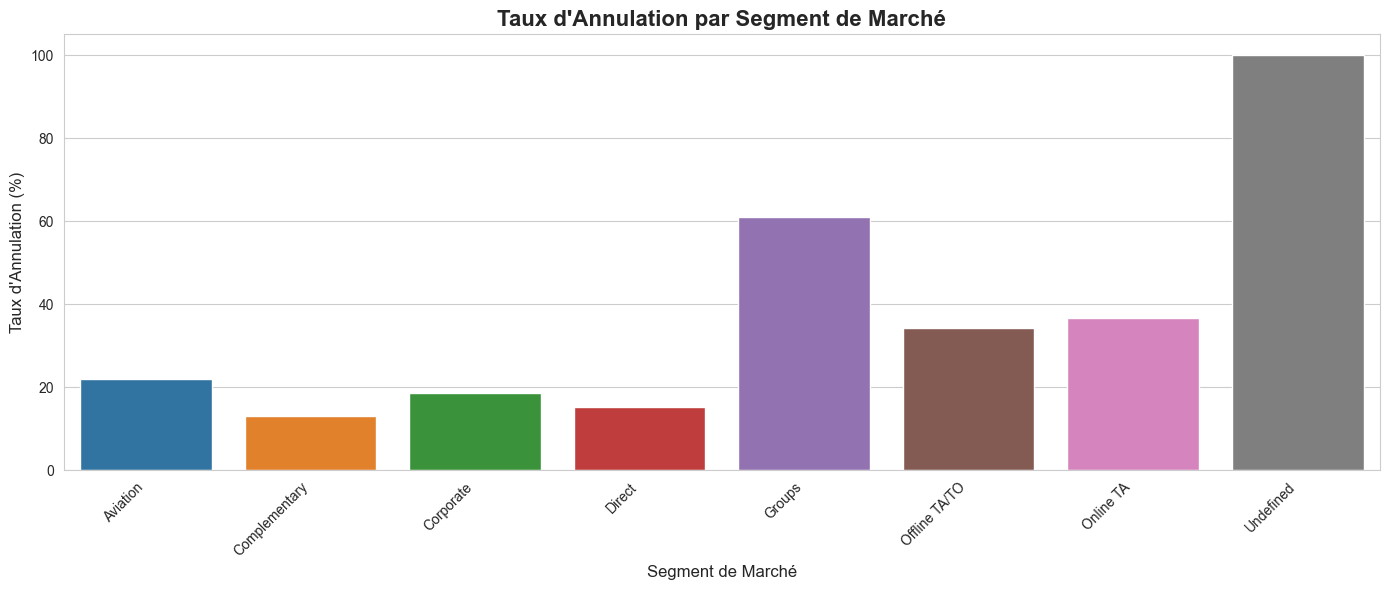


Taux d'annulation par segment de marché:
market_segment
Undefined        100.000000
Groups            61.062036
Online TA         36.721143
Offline TA/TO     34.316033
Aviation          21.940928
Corporate         18.734655
Direct            15.341901
Complementary     13.055182
Name: is_canceled, dtype: float64


In [22]:
# Taux d'annulation par type de marché
cancel_by_market = df.groupby('market_segment')['is_canceled'].mean() * 100

plt.figure(figsize=(14, 6))
sns.barplot(x=cancel_by_market.index, y=cancel_by_market.values, palette='tab10')
plt.title('Taux d\'Annulation par Segment de Marché', fontsize=16, fontweight='bold')
plt.xlabel('Segment de Marché', fontsize=12)
plt.ylabel('Taux d\'Annulation (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nTaux d'annulation par segment de marché:")
print(cancel_by_market.sort_values(ascending=False))


## 5. Analyse Multivariée - Relations Complexes


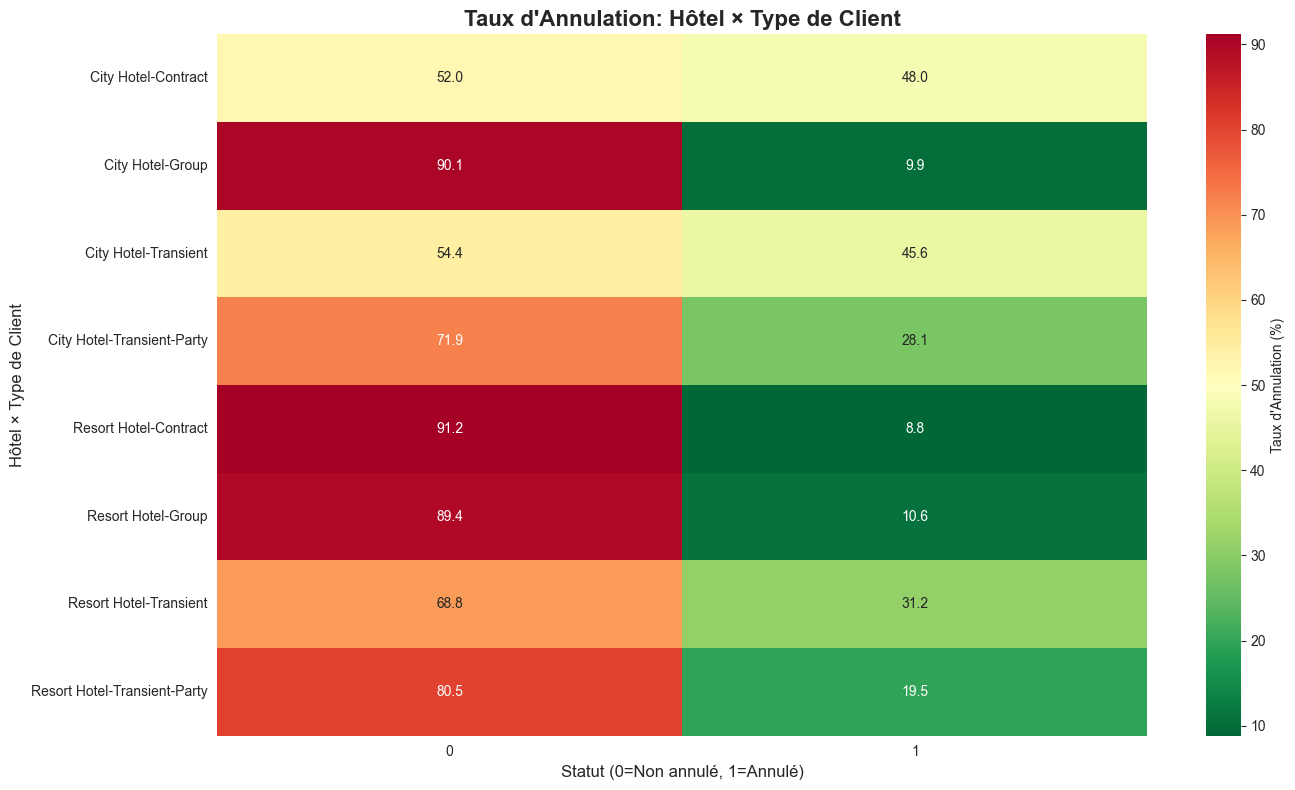


Tableau croisé:
is_canceled                           0          1
hotel        customer_type                        
City Hotel   Contract         51.956522  48.043478
             Group            90.102389   9.897611
             Transient        54.383543  45.616457
             Transient-Party  71.903306  28.096694
Resort Hotel Contract         91.159910   8.840090
             Group            89.436620  10.563380
             Transient        68.830481  31.169519
             Transient-Party  80.503145  19.496855


In [23]:
# Analyse croisée: Type d'hôtel vs Type de client vs Annulation
pivot_table = pd.crosstab([df['hotel'], df['customer_type']], df['is_canceled'], normalize='index') * 100

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='RdYlGn_r', cbar_kws={'label': 'Taux d\'Annulation (%)'})
plt.title('Taux d\'Annulation: Hôtel × Type de Client', fontsize=16, fontweight='bold')
plt.xlabel('Statut (0=Non annulé, 1=Annulé)', fontsize=12)
plt.ylabel('Hôtel × Type de Client', fontsize=12)
plt.tight_layout()
plt.show()

print("\nTableau croisé:")
print(pivot_table)


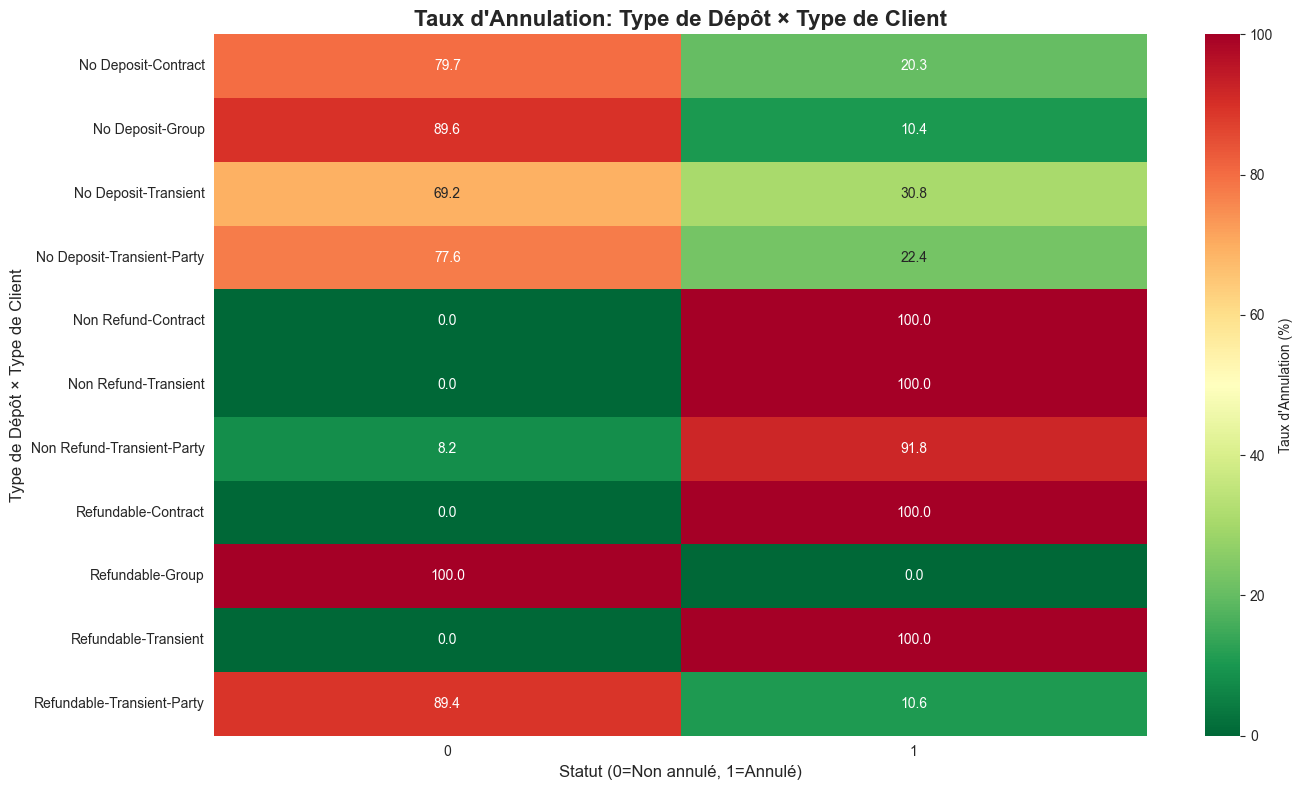

In [24]:
# Analyse croisée: Type de dépôt vs Type de client vs Annulation
pivot_table2 = pd.crosstab([df['deposit_type'], df['customer_type']], df['is_canceled'], normalize='index') * 100

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table2, annot=True, fmt='.1f', cmap='RdYlGn_r', cbar_kws={'label': 'Taux d\'Annulation (%)'})
plt.title('Taux d\'Annulation: Type de Dépôt × Type de Client', fontsize=16, fontweight='bold')
plt.xlabel('Statut (0=Non annulé, 1=Annulé)', fontsize=12)
plt.ylabel('Type de Dépôt × Type de Client', fontsize=12)
plt.tight_layout()
plt.show()


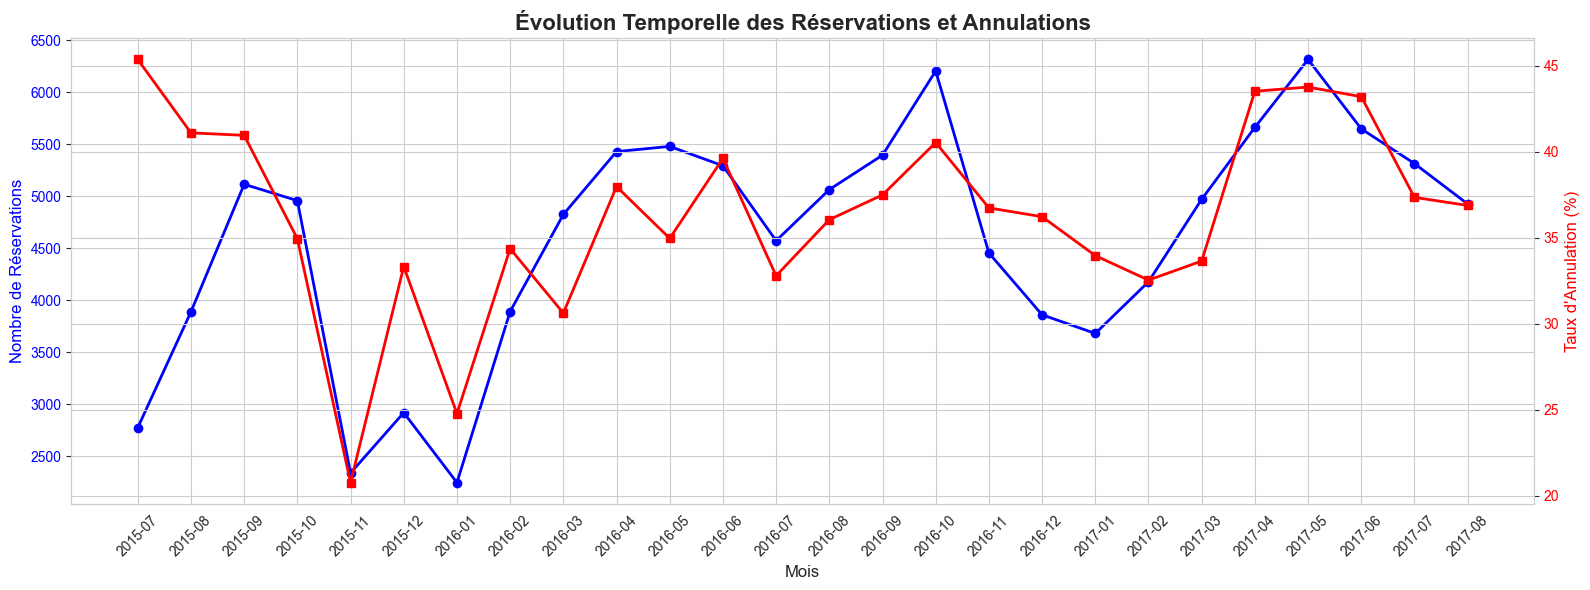

In [25]:
# Analyse temporelle: Réservations et annulations par année et mois
# Création de la date d'arrivée
df['arrival_date'] = pd.to_datetime(df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].apply(
    lambda x: f"{int(x['arrival_date_year'])}-{x['arrival_date_month']}-{int(x['arrival_date_day_of_month'])}", axis=1), errors='coerce')
df['year_month'] = df['arrival_date'].dt.to_period('M')
monthly_stats = df.groupby('year_month').agg({
    'is_canceled': ['count', 'sum', 'mean']
}).reset_index()
monthly_stats.columns = ['year_month', 'total_reservations', 'cancellations', 'cancel_rate']
plt.figure(figsize=(16, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(monthly_stats['year_month'].astype(str), monthly_stats['total_reservations'],
         marker='o', color='blue', label='Total Réservations', linewidth=2)
ax1.set_xlabel('Mois', fontsize=12)
ax1.set_ylabel('Nombre de Réservations', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)
ax2.plot(monthly_stats['year_month'].astype(str), monthly_stats['cancel_rate'] * 100,
         marker='s', color='red', label='Taux d\'Annulation', linewidth=2)
ax2.set_ylabel('Taux d\'Annulation (%)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Évolution Temporelle des Réservations et Annulations', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



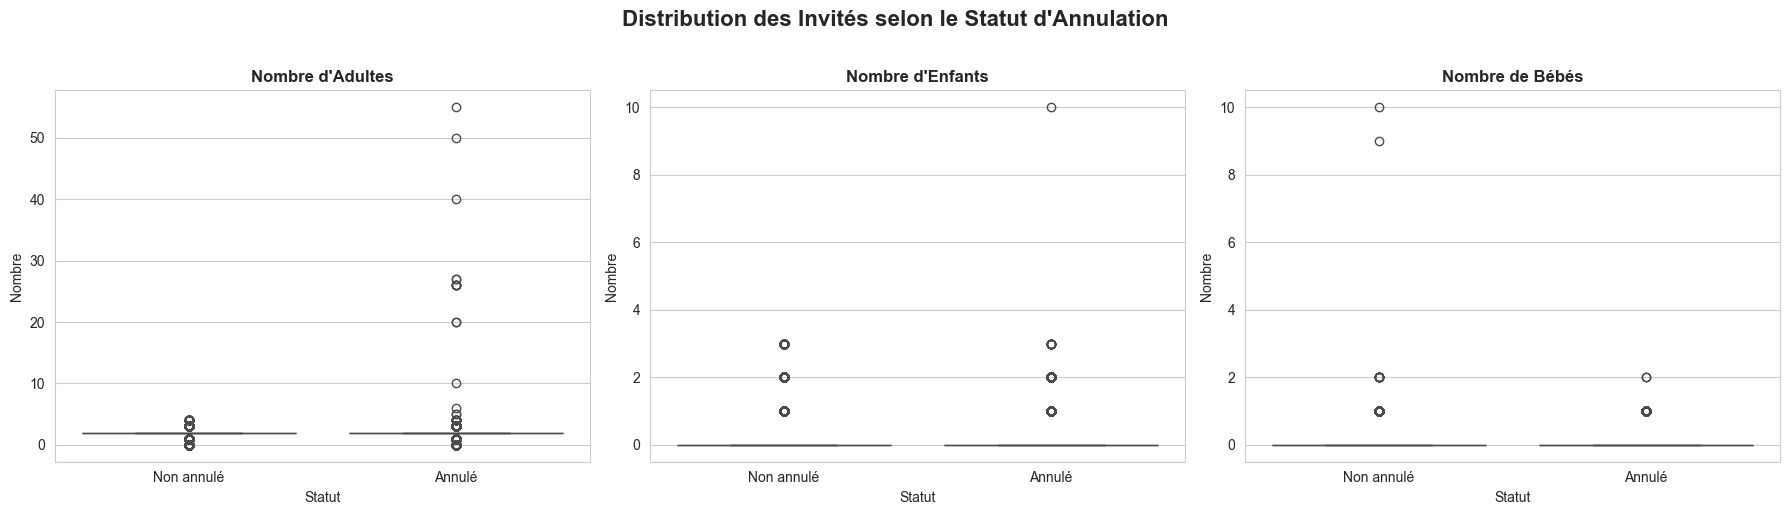

In [26]:
# Distribution des invités (adultes, enfants, bébés) selon l'annulation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df, x='is_canceled', y='adults', palette=['#2ecc71', '#e74c3c'], ax=axes[0])
axes[0].set_title('Nombre d\'Adultes', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Statut', fontsize=10)
axes[0].set_ylabel('Nombre', fontsize=10)
axes[0].set_xticklabels(['Non annulé', 'Annulé'])

sns.boxplot(data=df, x='is_canceled', y='children', palette=['#2ecc71', '#e74c3c'], ax=axes[1])
axes[1].set_title('Nombre d\'Enfants', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Statut', fontsize=10)
axes[1].set_ylabel('Nombre', fontsize=10)
axes[1].set_xticklabels(['Non annulé', 'Annulé'])

sns.boxplot(data=df, x='is_canceled', y='babies', palette=['#2ecc71', '#e74c3c'], ax=axes[2])
axes[2].set_title('Nombre de Bébés', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Statut', fontsize=10)
axes[2].set_ylabel('Nombre', fontsize=10)
axes[2].set_xticklabels(['Non annulé', 'Annulé'])

plt.suptitle('Distribution des Invités selon le Statut d\'Annulation', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


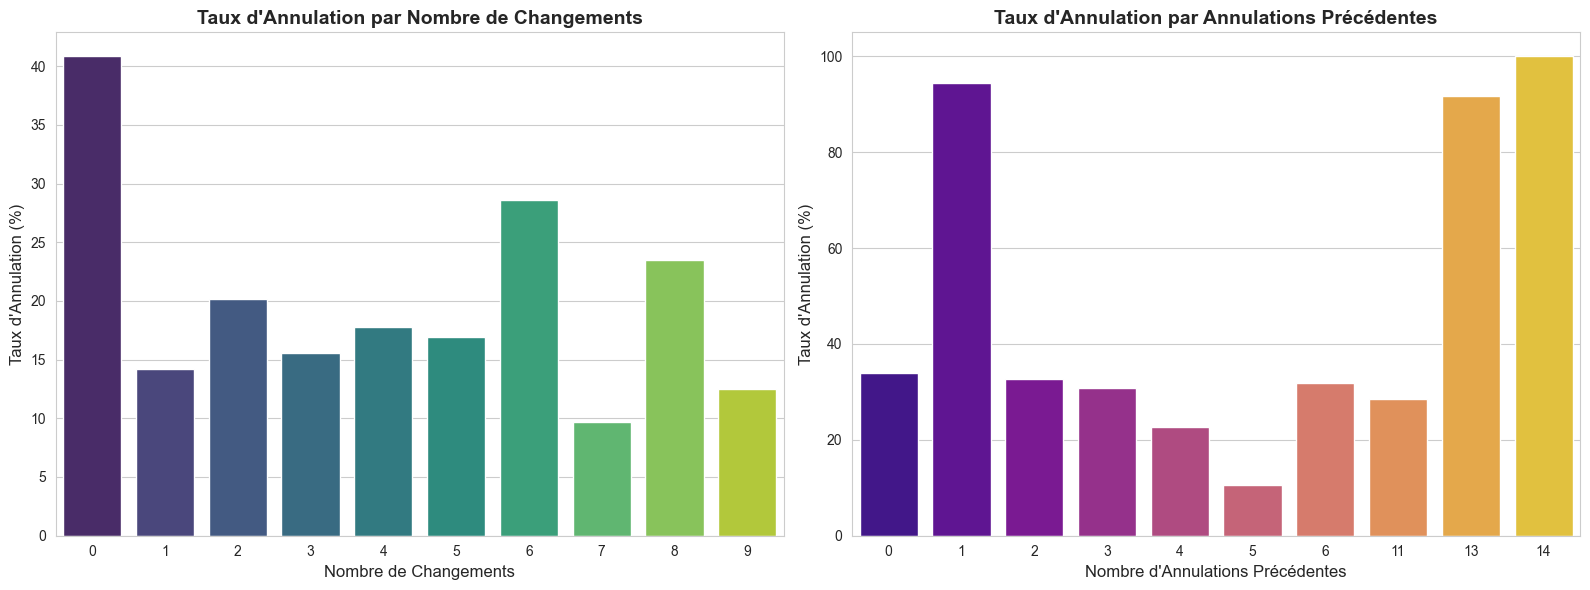


Taux d'annulation par nombre de changements:
booking_changes
0    40.854176
1    14.227226
2    20.131406
3    15.533981
4    17.819149
Name: is_canceled, dtype: float64

Taux d'annulation par annulations précédentes:
previous_cancellations
0    33.906081
1    94.430673
2    32.758621
3    30.769231
4    22.580645
Name: is_canceled, dtype: float64


In [27]:
# Taux d'annulation par nombre de changements de réservation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Booking changes
cancel_by_changes = df.groupby('booking_changes')['is_canceled'].mean() * 100
changes_to_plot = cancel_by_changes.head(10)  # Limiter à 10 pour la lisibilité
sns.barplot(x=changes_to_plot.index, y=changes_to_plot.values, palette='viridis', ax=axes[0])
axes[0].set_title('Taux d\'Annulation par Nombre de Changements', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Nombre de Changements', fontsize=12)
axes[0].set_ylabel('Taux d\'Annulation (%)', fontsize=12)

# Previous cancellations
cancel_by_prev = df.groupby('previous_cancellations')['is_canceled'].mean() * 100
prev_to_plot = cancel_by_prev.head(10)
sns.barplot(x=prev_to_plot.index, y=prev_to_plot.values, palette='plasma', ax=axes[1])
axes[1].set_title('Taux d\'Annulation par Annulations Précédentes', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Nombre d\'Annulations Précédentes', fontsize=12)
axes[1].set_ylabel('Taux d\'Annulation (%)', fontsize=12)

plt.tight_layout()
plt.show()

print("\nTaux d'annulation par nombre de changements:")
print(cancel_by_changes.head())
print("\nTaux d'annulation par annulations précédentes:")
print(cancel_by_prev.head())


## 6. Insights et Conclusions Principales


1. TAUX D'ANNULATION GLOBAL:
   - Taux moyen: 37.04%
   - Réservations annulées: 44,224
   - Réservations non annulées: 75,166

   

2. PAR TYPE D'HÔTEL:
   - Resort Hotel: 27.76% (11,122 annulations)
   - City Hotel: 41.73% (33,102 annulations)

3. FACTEURS LES PLUS IMPACTANTS:
   - Type de dépôt:
     * No Deposit: 28.38%
     * Refundable: 22.22%
     * Non Refund: 99.36%

   - Type de client:
     * Transient: 40.75%
     * Contract: 30.96%
     * Transient-Party: 25.43%
     * Group: 10.23%

## 7. Analyses Complémentaires 

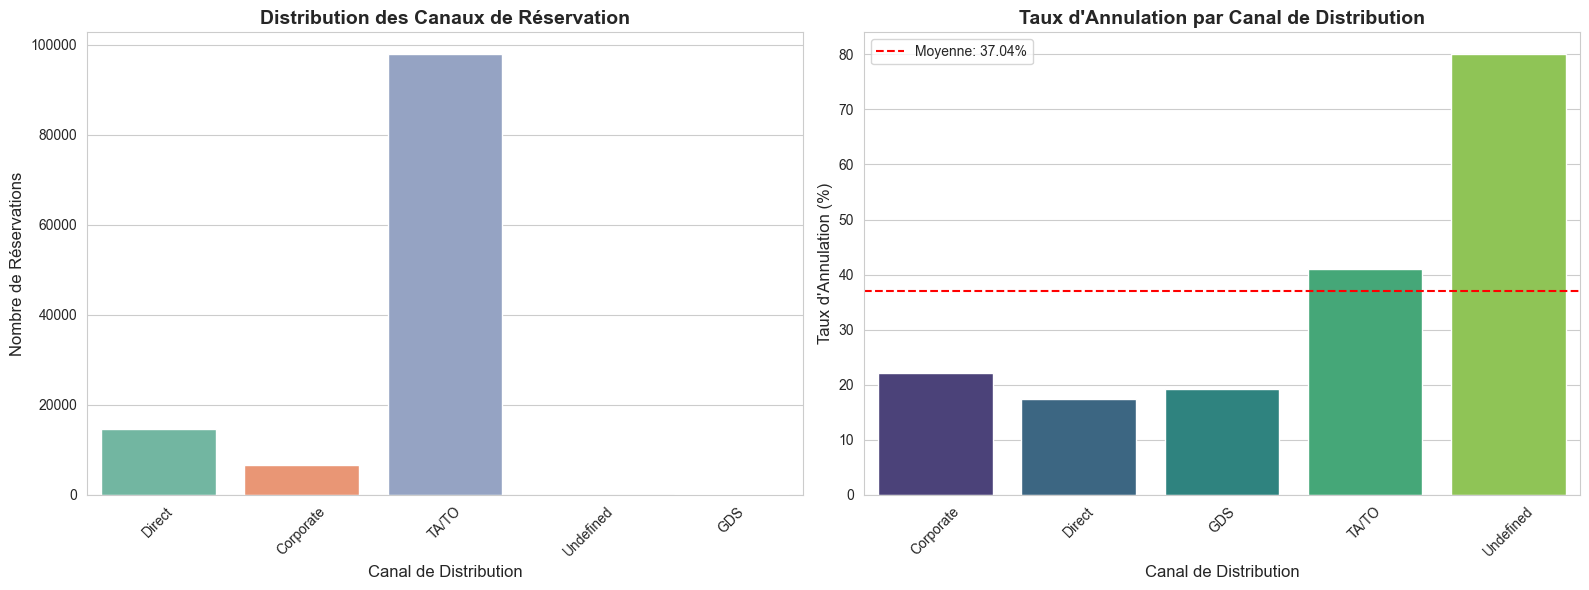


Distribution par canal:
distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

Taux d'annulation par canal:
distribution_channel
Undefined    80.000000
TA/TO        41.025851
Corporate    22.075783
GDS          19.170984
Direct       17.459884
Name: is_canceled, dtype: float64


In [28]:
# Distribution et taux d'annulation par canal de distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Distribution
sns.countplot(data=df, x='distribution_channel', palette='Set2', ax=axes[0])
axes[0].set_title('Distribution des Canaux de Réservation', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Canal de Distribution', fontsize=12)
axes[0].set_ylabel('Nombre de Réservations', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Taux d'annulation
cancel_by_channel = df.groupby('distribution_channel')['is_canceled'].mean() * 100
sns.barplot(x=cancel_by_channel.index, y=cancel_by_channel.values, palette='viridis', ax=axes[1])
axes[1].set_title('Taux d\'Annulation par Canal de Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Canal de Distribution', fontsize=12)
axes[1].set_ylabel('Taux d\'Annulation (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(df['is_canceled'].mean() * 100, color='red', linestyle='--',
                label=f'Moyenne: {df["is_canceled"].mean()*100:.2f}%')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\nDistribution par canal:")
print(df['distribution_channel'].value_counts())
print("\nTaux d'annulation par canal:")
print(cancel_by_channel.sort_values(ascending=False))

### 7.2. Analyse des Types de Chambres (reserved_room_type vs assigned_room_type)


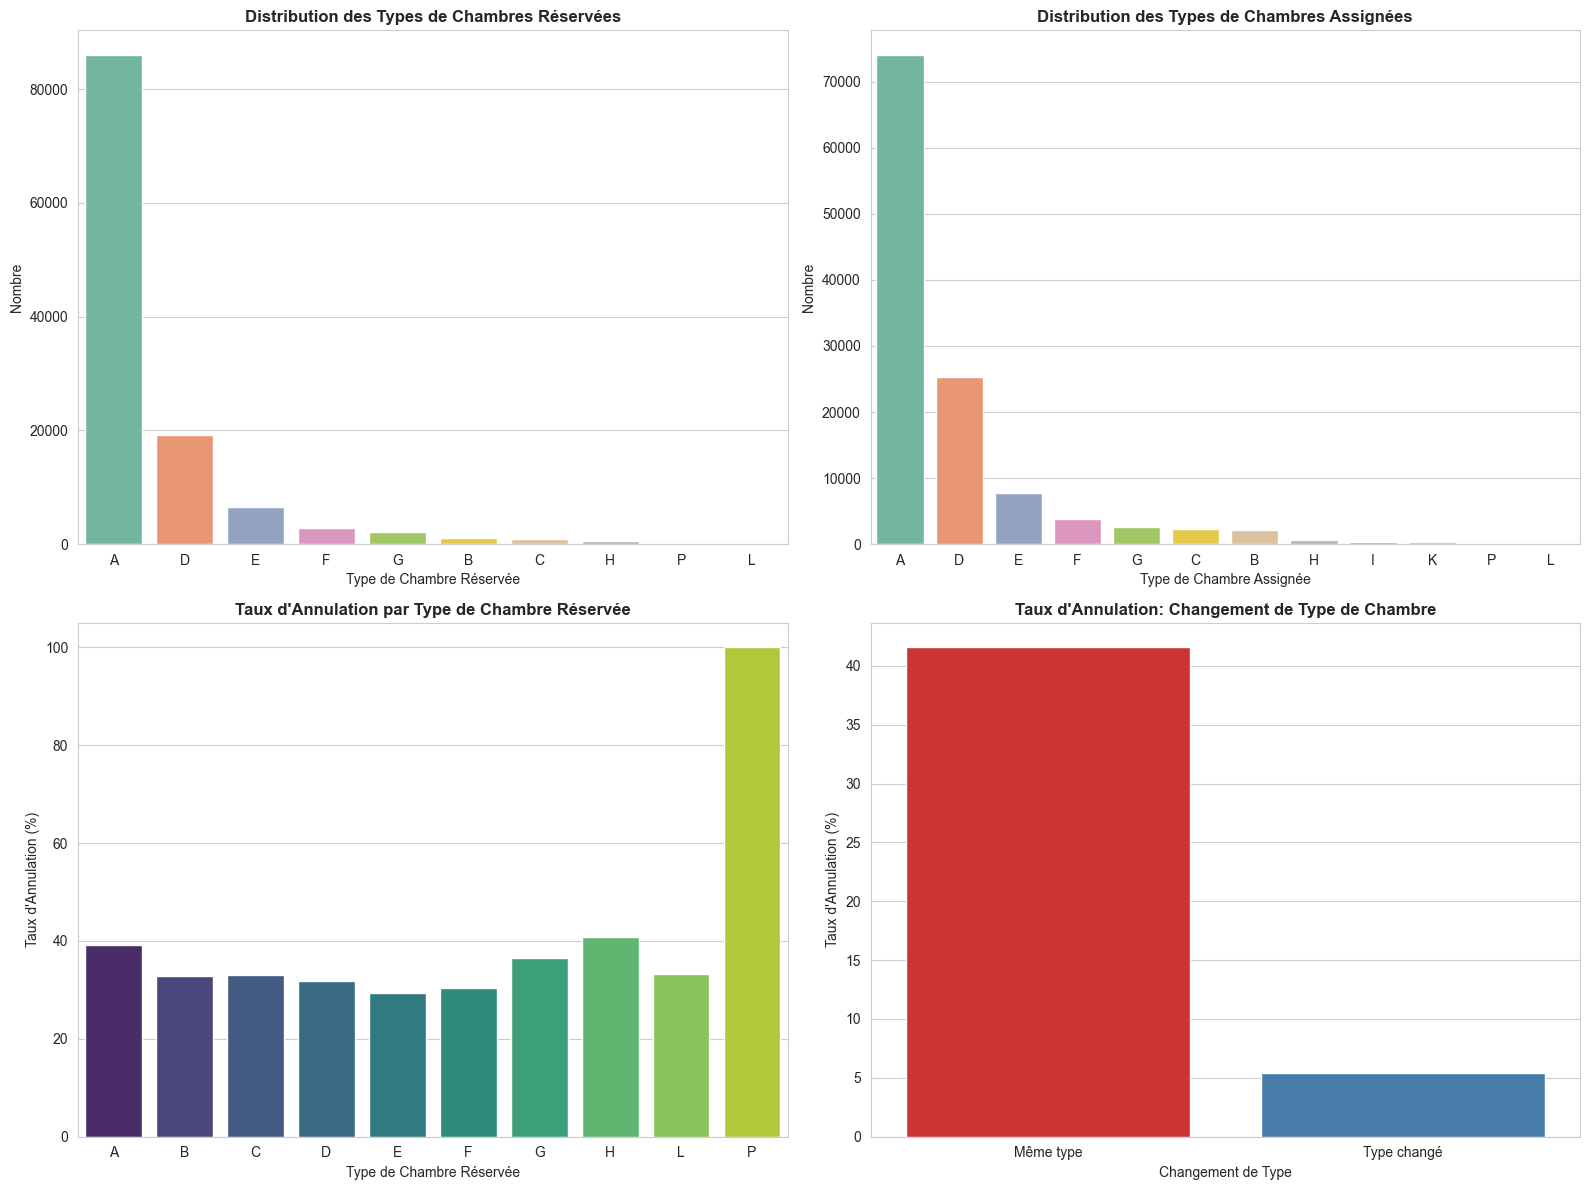


Types de chambres réservées:
reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: int64

Types de chambres assignées:
assigned_room_type
A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: count, dtype: int64

Taux d'annulation par type de chambre réservée:
reserved_room_type
P    100.000000
H     40.765391
A     39.107380
G     36.437440
L     33.333333
C     33.047210
B     32.915921
D     31.779595
F     30.376251
E     29.288447
Name: is_canceled, dtype: float64

Pourcentage de changements de type: 12.49%
Taux d'annulation (même type): 41.56%
Taux d'annulation (type changé): 5.38%


In [29]:
# Analyse des types de chambres réservées vs assignées
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribution des types de chambres réservées
sns.countplot(data=df, x='reserved_room_type', palette='Set2', ax=axes[0, 0], order=df['reserved_room_type'].value_counts().index)
axes[0, 0].set_title('Distribution des Types de Chambres Réservées', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Type de Chambre Réservée', fontsize=10)
axes[0, 0].set_ylabel('Nombre', fontsize=10)

# Distribution des types de chambres assignées
sns.countplot(data=df, x='assigned_room_type', palette='Set2', ax=axes[0, 1], order=df['assigned_room_type'].value_counts().index)
axes[0, 1].set_title('Distribution des Types de Chambres Assignées', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Type de Chambre Assignée', fontsize=10)
axes[0, 1].set_ylabel('Nombre', fontsize=10)

# Taux d'annulation par type de chambre réservée
cancel_by_reserved = df.groupby('reserved_room_type')['is_canceled'].mean() * 100
sns.barplot(x=cancel_by_reserved.index, y=cancel_by_reserved.values, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Taux d\'Annulation par Type de Chambre Réservée', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Type de Chambre Réservée', fontsize=10)
axes[1, 0].set_ylabel('Taux d\'Annulation (%)', fontsize=10)

# Vérification des changements de type de chambre
df['room_type_changed'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)
cancel_by_change = df.groupby('room_type_changed')['is_canceled'].mean() * 100
sns.barplot(x=['Même type', 'Type changé'], y=cancel_by_change.values, palette='Set1', ax=axes[1, 1])
axes[1, 1].set_title('Taux d\'Annulation: Changement de Type de Chambre', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Changement de Type', fontsize=10)
axes[1, 1].set_ylabel('Taux d\'Annulation (%)', fontsize=10)

plt.tight_layout()
plt.show()

print("\nTypes de chambres réservées:")
print(df['reserved_room_type'].value_counts())
print("\nTypes de chambres assignées:")
print(df['assigned_room_type'].value_counts())
print("\nTaux d'annulation par type de chambre réservée:")
print(cancel_by_reserved.sort_values(ascending=False))
print(f"\nPourcentage de changements de type: {df['room_type_changed'].mean()*100:.2f}%")
print(f"Taux d'annulation (même type): {cancel_by_change[0]:.2f}%")
print(f"Taux d'annulation (type changé): {cancel_by_change[1]:.2f}%")


### 7.3. Analyse des Clients Récurrents (is_repeated_guest)


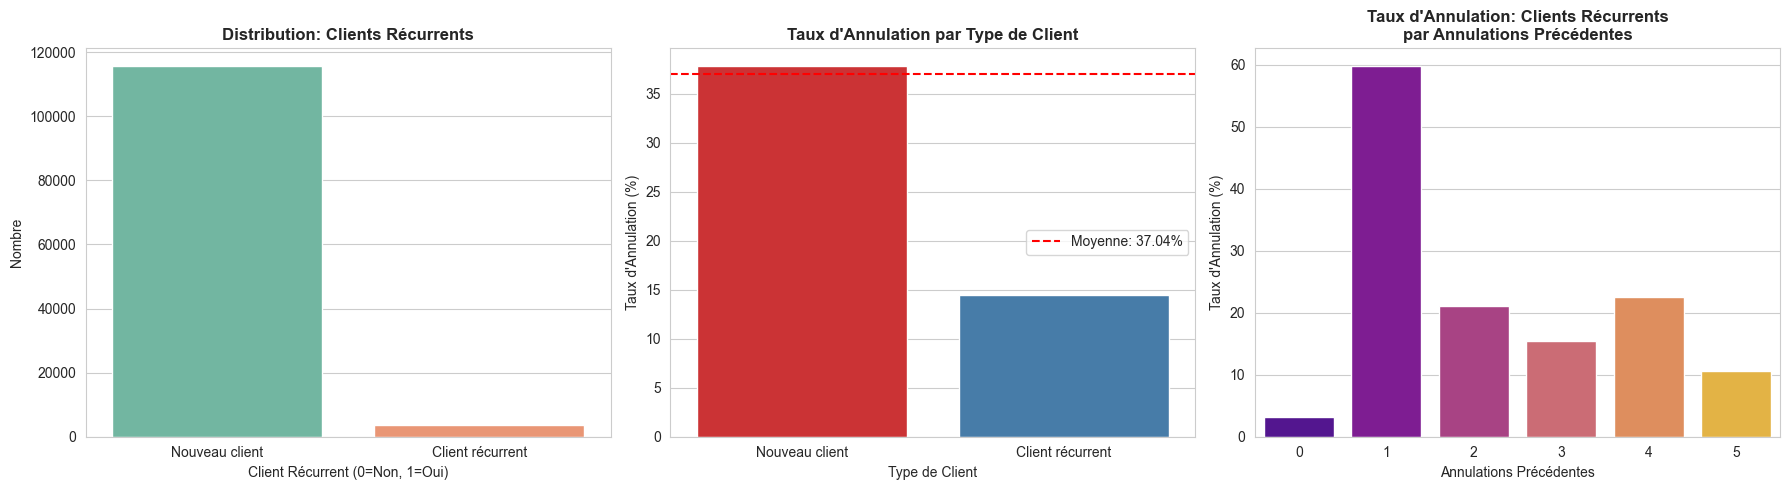


Distribution des clients récurrents:
is_repeated_guest
0    115580
1      3810
Name: count, dtype: int64

Pourcentage de clients récurrents: 3.19%

Taux d'annulation:
  - Nouveaux clients: 37.79%
  - Clients récurrents: 14.49%

Statistiques pour les clients récurrents:
  - Nombre moyen d'annulations précédentes: 0.47
  - Nombre moyen de réservations non annulées précédentes: 3.59


In [30]:
# Analyse approfondie des clients récurrents
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribution
sns.countplot(data=df, x='is_repeated_guest', palette='Set2', ax=axes[0])
axes[0].set_title('Distribution: Clients Récurrents', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Client Récurrent (0=Non, 1=Oui)', fontsize=10)
axes[0].set_ylabel('Nombre', fontsize=10)
axes[0].set_xticklabels(['Nouveau client', 'Client récurrent'])

# Taux d'annulation
cancel_by_repeated = df.groupby('is_repeated_guest')['is_canceled'].mean() * 100
sns.barplot(x=['Nouveau client', 'Client récurrent'], y=cancel_by_repeated.values, palette='Set1', ax=axes[1])
axes[1].set_title('Taux d\'Annulation par Type de Client', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Type de Client', fontsize=10)
axes[1].set_ylabel('Taux d\'Annulation (%)', fontsize=10)
axes[1].axhline(df['is_canceled'].mean() * 100, color='red', linestyle='--',
                label=f'Moyenne: {df["is_canceled"].mean()*100:.2f}%')
axes[1].legend()

# Comparaison avec annulations précédentes
df_repeated = df[df['is_repeated_guest'] == 1]
cancel_by_prev_cancel = df_repeated.groupby('previous_cancellations')['is_canceled'].mean() * 100
prev_cancel_to_plot = cancel_by_prev_cancel.head(6)
sns.barplot(x=prev_cancel_to_plot.index, y=prev_cancel_to_plot.values, palette='plasma', ax=axes[2])
axes[2].set_title('Taux d\'Annulation: Clients Récurrents\npar Annulations Précédentes', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Annulations Précédentes', fontsize=10)
axes[2].set_ylabel('Taux d\'Annulation (%)', fontsize=10)

plt.tight_layout()
plt.show()

print("\nDistribution des clients récurrents:")
print(df['is_repeated_guest'].value_counts())
print(f"\nPourcentage de clients récurrents: {df['is_repeated_guest'].mean()*100:.2f}%")
print("\nTaux d'annulation:")
print(f"  - Nouveaux clients: {cancel_by_repeated[0]:.2f}%")
print(f"  - Clients récurrents: {cancel_by_repeated[1]:.2f}%")
print("\nStatistiques pour les clients récurrents:")
print(f"  - Nombre moyen d'annulations précédentes: {df_repeated['previous_cancellations'].mean():.2f}")
print(f"  - Nombre moyen de réservations non annulées précédentes: {df_repeated['previous_bookings_not_canceled'].mean():.2f}")


### 7.4. Analyse des Places de Parking et Demandes Spéciales


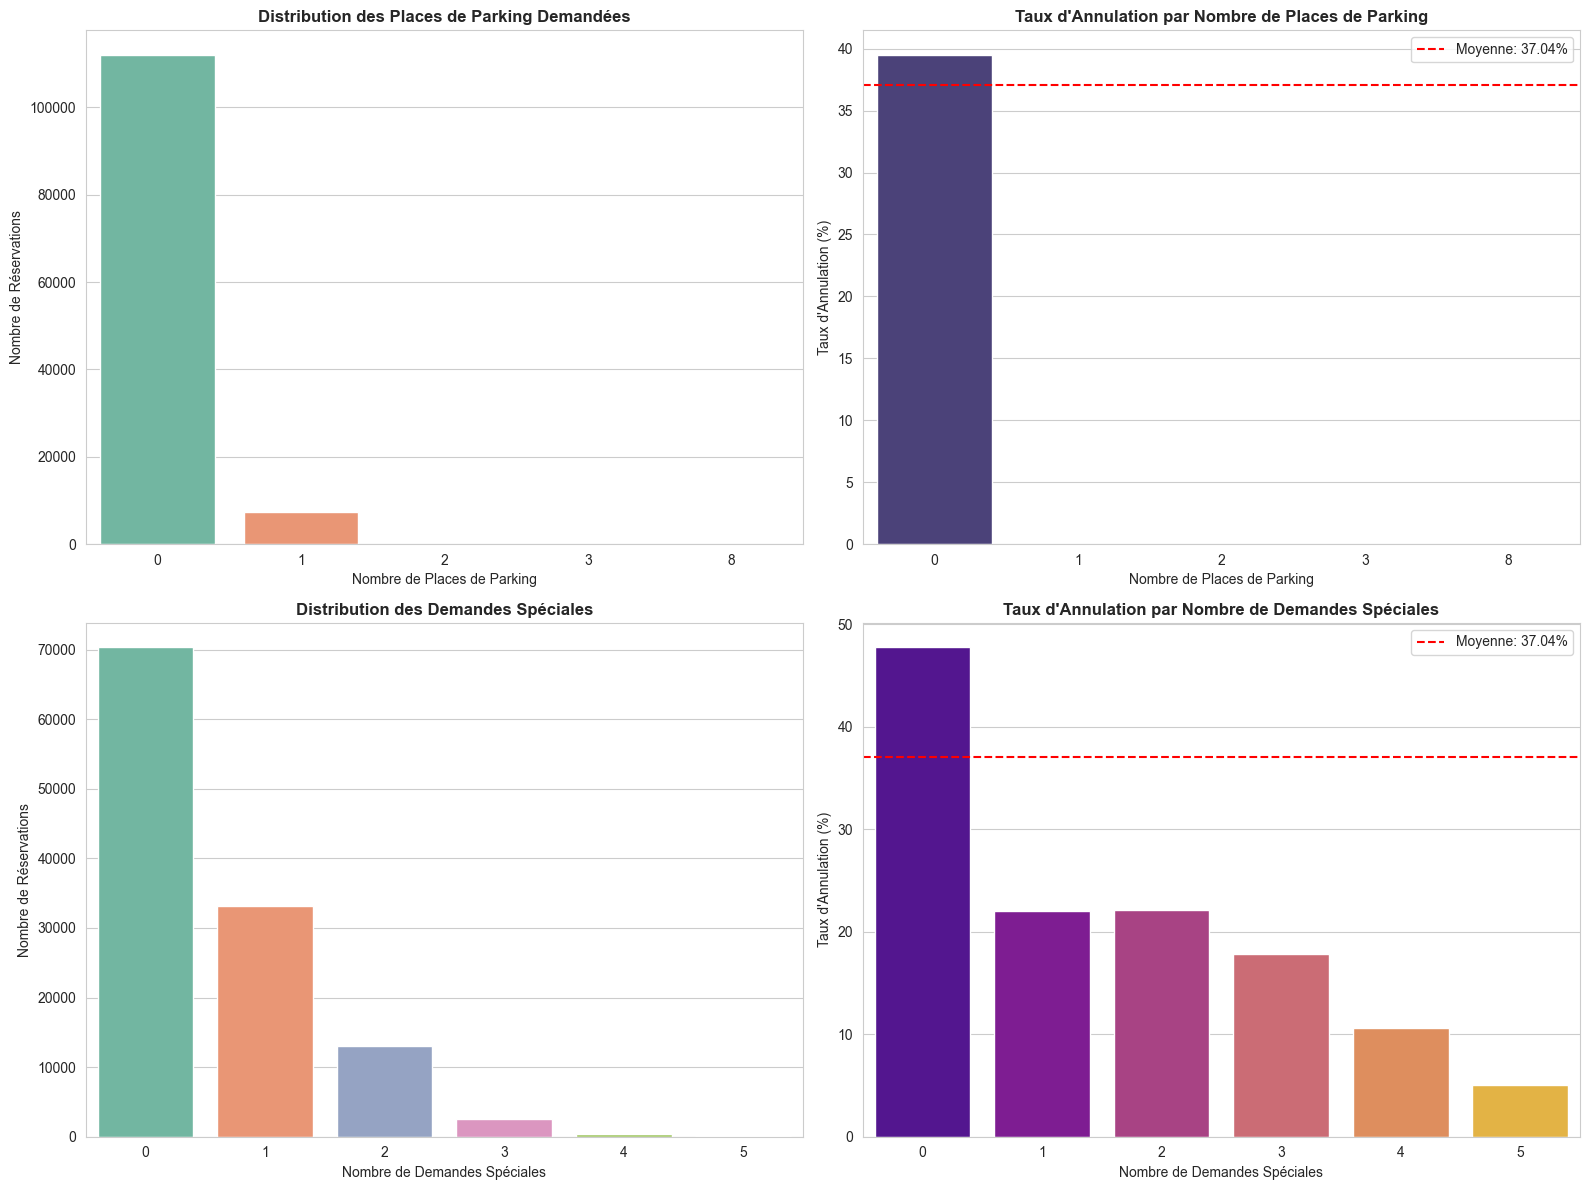


Distribution des places de parking:
required_car_parking_spaces
0    111974
1      7383
2        28
3         3
8         2
Name: count, dtype: int64

Taux d'annulation par places de parking:
required_car_parking_spaces
0    39.494883
1     0.000000
2     0.000000
3     0.000000
8     0.000000
Name: is_canceled, dtype: float64

Distribution des demandes spéciales:
total_of_special_requests
0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: count, dtype: int64

Taux d'annulation par demandes spéciales:
total_of_special_requests
0    47.720356
1    22.024920
2    22.098851
3    17.861434
4    10.588235
5     5.000000
Name: is_canceled, dtype: float64


In [31]:
# Analyse approfondie des places de parking et demandes spéciales
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribution des places de parking
parking_counts = df['required_car_parking_spaces'].value_counts().sort_index()
sns.barplot(x=parking_counts.index, y=parking_counts.values, palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Distribution des Places de Parking Demandées', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Nombre de Places de Parking', fontsize=10)
axes[0, 0].set_ylabel('Nombre de Réservations', fontsize=10)

# Taux d'annulation par nombre de places de parking
cancel_by_parking = df.groupby('required_car_parking_spaces')['is_canceled'].mean() * 100
sns.barplot(x=cancel_by_parking.index, y=cancel_by_parking.values, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Taux d\'Annulation par Nombre de Places de Parking', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Nombre de Places de Parking', fontsize=10)
axes[0, 1].set_ylabel('Taux d\'Annulation (%)', fontsize=10)
axes[0, 1].axhline(df['is_canceled'].mean() * 100, color='red', linestyle='--',
                   label=f'Moyenne: {df["is_canceled"].mean()*100:.2f}%')
axes[0, 1].legend()

# Distribution des demandes spéciales
special_counts = df['total_of_special_requests'].value_counts().sort_index()
sns.barplot(x=special_counts.index, y=special_counts.values, palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Distribution des Demandes Spéciales', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Nombre de Demandes Spéciales', fontsize=10)
axes[1, 0].set_ylabel('Nombre de Réservations', fontsize=10)

# Taux d'annulation par nombre de demandes spéciales
cancel_by_special = df.groupby('total_of_special_requests')['is_canceled'].mean() * 100
sns.barplot(x=cancel_by_special.index, y=cancel_by_special.values, palette='plasma', ax=axes[1, 1])
axes[1, 1].set_title('Taux d\'Annulation par Nombre de Demandes Spéciales', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Nombre de Demandes Spéciales', fontsize=10)
axes[1, 1].set_ylabel('Taux d\'Annulation (%)', fontsize=10)
axes[1, 1].axhline(df['is_canceled'].mean() * 100, color='red', linestyle='--',
                   label=f'Moyenne: {df["is_canceled"].mean()*100:.2f}%')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("\nDistribution des places de parking:")
print(parking_counts)
print("\nTaux d'annulation par places de parking:")
print(cancel_by_parking)
print("\nDistribution des demandes spéciales:")
print(special_counts)
print("\nTaux d'annulation par demandes spéciales:")
print(cancel_by_special)


### 7.5. Vérification: reservation_status vs is_canceled


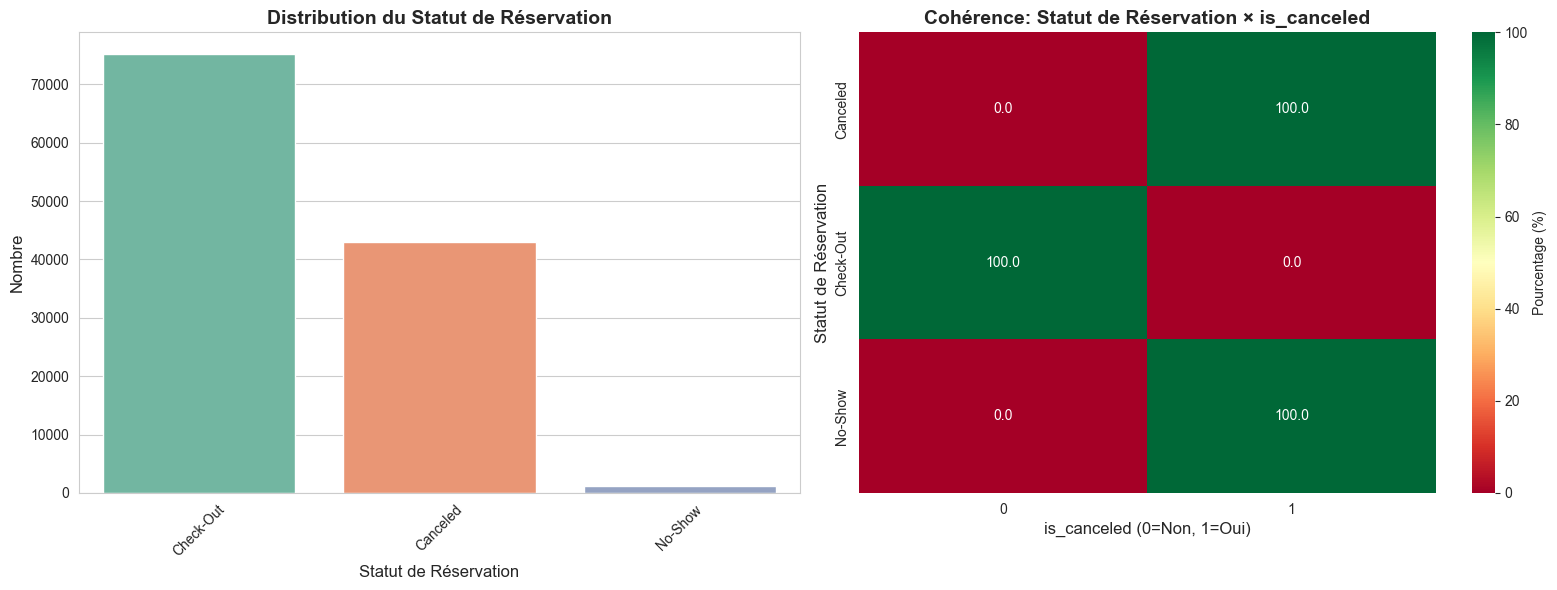


Distribution du statut de réservation:
reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

Tableau croisé (en pourcentage):
is_canceled             0      1
reservation_status              
Canceled              0.0  100.0
Check-Out           100.0    0.0
No-Show               0.0  100.0

Vérification de cohérence:
  - Réservations avec status 'Canceled' et is_canceled=1: 100.00%
  - Réservations avec status 'Check-Out' et is_canceled=0: 100.00%
  - Réservations avec status 'No-Show' et is_canceled=1: 100.00%


In [32]:
# Vérification de la cohérence entre reservation_status et is_canceled
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Distribution du statut de réservation
sns.countplot(data=df, x='reservation_status', palette='Set2', ax=axes[0])
axes[0].set_title('Distribution du Statut de Réservation', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Statut de Réservation', fontsize=12)
axes[0].set_ylabel('Nombre', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Tableau croisé pour vérifier la cohérence
crosstab = pd.crosstab(df['reservation_status'], df['is_canceled'], normalize='index') * 100
sns.heatmap(crosstab, annot=True, fmt='.1f', cmap='RdYlGn', cbar_kws={'label': 'Pourcentage (%)'}, ax=axes[1])
axes[1].set_title('Cohérence: Statut de Réservation × is_canceled', fontsize=14, fontweight='bold')
axes[1].set_xlabel('is_canceled (0=Non, 1=Oui)', fontsize=12)
axes[1].set_ylabel('Statut de Réservation', fontsize=12)

plt.tight_layout()
plt.show()

print("\nDistribution du statut de réservation:")
print(df['reservation_status'].value_counts())
print("\nTableau croisé (en pourcentage):")
print(crosstab)
print("\nVérification de cohérence:")
print(f"  - Réservations avec status 'Canceled' et is_canceled=1: {(df[(df['reservation_status']=='Canceled') & (df['is_canceled']==1)].shape[0] / df[df['reservation_status']=='Canceled'].shape[0])*100:.2f}%")
print(f"  - Réservations avec status 'Check-Out' et is_canceled=0: {(df[(df['reservation_status']=='Check-Out') & (df['is_canceled']==0)].shape[0] / df[df['reservation_status']=='Check-Out'].shape[0])*100:.2f}%")
print(f"  - Réservations avec status 'No-Show' et is_canceled=1: {(df[(df['reservation_status']=='No-Show') & (df['is_canceled']==1)].shape[0] / df[df['reservation_status']=='No-Show'].shape[0])*100:.2f}%")


### 7.6. Analyse des Jours en Liste d'Attente (days_in_waiting_list)


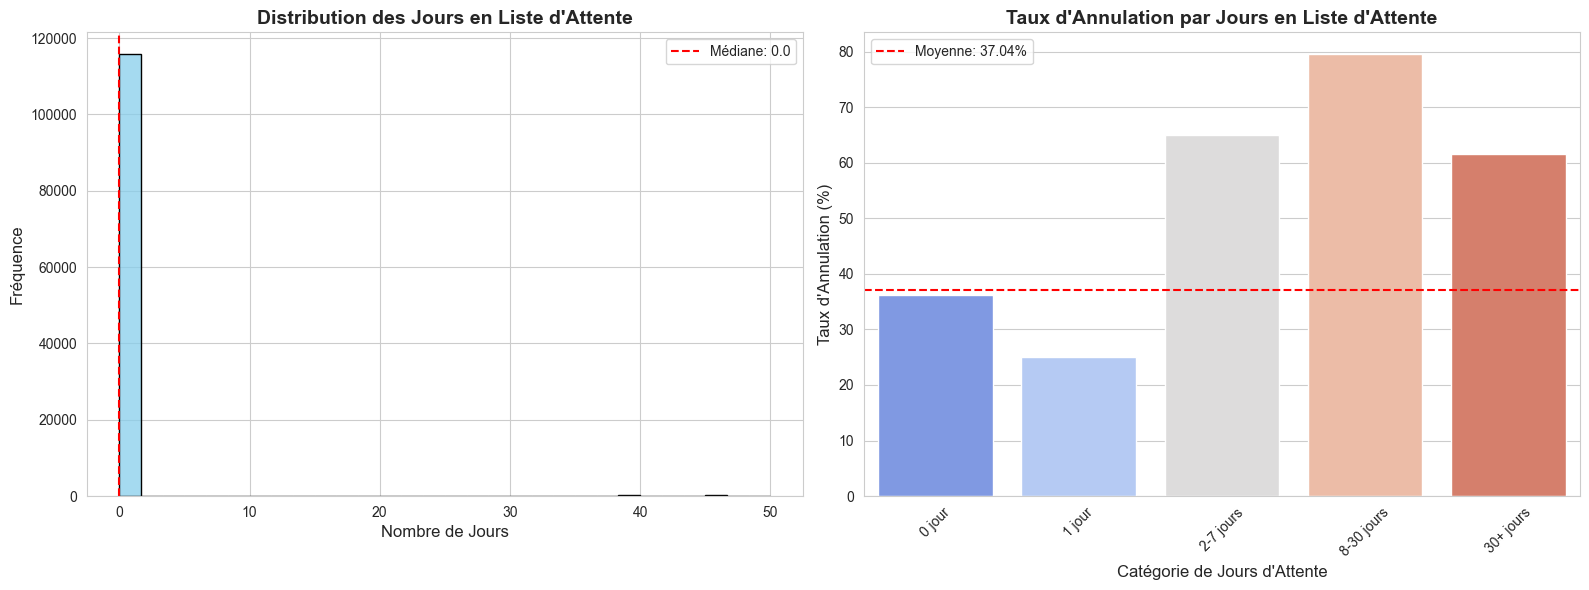


Statistiques des jours en liste d'attente:
count    119390.000000
mean          2.321149
std          17.594721
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         391.000000
Name: days_in_waiting_list, dtype: float64

Pourcentage de réservations sans attente: 96.90%

Taux d'annulation par catégorie:
waiting_category
0 jour        36.186599
1 jour        25.000000
2-7 jours     64.957265
8-30 jours    79.481641
30+ jours     61.558274
Name: is_canceled, dtype: float64


In [33]:
# Analyse des jours en liste d'attente
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Distribution (limiter aux valeurs < 50 pour meilleure visualisation)
df_waiting_clean = df[df['days_in_waiting_list'] <= 50]
sns.histplot(data=df_waiting_clean, x='days_in_waiting_list', bins=30,
             color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Distribution des Jours en Liste d\'Attente', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Nombre de Jours', fontsize=12)
axes[0].set_ylabel('Fréquence', fontsize=12)
axes[0].axvline(df['days_in_waiting_list'].median(), color='red', linestyle='--',
                label=f'Médiane: {df["days_in_waiting_list"].median():.1f}')
axes[0].legend()

# Taux d'annulation par catégorie de jours d'attente
df['waiting_category'] = pd.cut(df['days_in_waiting_list'],
                                 bins=[-1, 0, 1, 7, 30, float('inf')],
                                 labels=['0 jour', '1 jour', '2-7 jours', '8-30 jours', '30+ jours'])
cancel_by_waiting = df.groupby('waiting_category')['is_canceled'].mean() * 100
sns.barplot(x=cancel_by_waiting.index, y=cancel_by_waiting.values, palette='coolwarm', ax=axes[1])
axes[1].set_title('Taux d\'Annulation par Jours en Liste d\'Attente', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Catégorie de Jours d\'Attente', fontsize=12)
axes[1].set_ylabel('Taux d\'Annulation (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(df['is_canceled'].mean() * 100, color='red', linestyle='--',
                label=f'Moyenne: {df["is_canceled"].mean()*100:.2f}%')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\nStatistiques des jours en liste d'attente:")
print(df['days_in_waiting_list'].describe())
print(f"\nPourcentage de réservations sans attente: {(df['days_in_waiting_list']==0).mean()*100:.2f}%")
print("\nTaux d'annulation par catégorie:")
print(cancel_by_waiting)
